<h1><center> EDA of State Bank of India(SBIN) Stock in BSE(Bombay Stock Exchange)</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1. Reading Data

Data for SBIN is extracted from https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=0 For period Jan,2011 to Feb,2020

In [2]:
data = pd.read_csv('./data/sbin_jan11tofeb20.csv', index_col='Date', parse_dates=['Date'])
data.head()

Open Price  High Price  Low Price  Close Price         WAP  \
Date                                                                     
2020-02-28      313.00       314.7     301.20       302.90  308.296160   
2020-02-27      328.25       330.0     318.05       321.95  323.006421   
2020-02-26      325.00       330.7     324.35       328.25  327.585960   
2020-02-25      325.25       328.0     322.20       326.60  325.608095   
2020-02-24      325.95       331.2     321.95       322.90  326.672969   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2020-02-28       2380015          25773           733749486.0   
2020-02-27       1439722          15837           465039450.0   
2020-02-26       1431670          14348           468994991.0   
2020-02-25       1294432          15108           421477538.0   
2020-02-24       1582310          18064           516897905.0   

            Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
Date                                                                           
2020-02-28              636491.0                      26.74            13.50   
2020-02-27              257133.0                      17.86            11.95   
2020-02-26              181993.0                      12.71             6.35   
2020-02-25              299789.0                      23.16             5.80   
2020-02-24              288053.0                      18.20             9.25   

            Spread Close-Open  
Date                           
2020-02-28             -10.10  
2020-02-27              -6.30  
2020-02-26               3.25  
2020-02-25               1.35  
2020-02-24              -3.05

In [3]:
data = data.sort_index()

In [4]:
data.head()

Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2011-01-03     2830.05     2852.45    2815.00      2820.85  2836.219894   
2011-01-04     2834.30     2834.30    2727.35      2733.60  2758.975846   
2011-01-05     2734.00     2734.50    2686.05      2697.30  2700.262682   
2011-01-06     2712.25     2717.00    2614.15      2625.20  2644.409356   
2011-01-07     2621.40     2642.90    2572.15      2599.85  2607.158434   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2011-01-03        316334          15414          8.971928e+08   
2011-01-04        735198          34459          2.028394e+09   
2011-01-05        725695          31719          1.959567e+09   
2011-01-06        985972          51213          2.607314e+09   
2011-01-07       1271505          68147          3.315015e+09   

            Deliverable Quantity  % Deli. Qty to Traded Qty  Spread High-Low  \
Date                                                                           
2011-01-03               50852.0                      16.08            37.45   
2011-01-04              199853.0                      27.18           106.95   
2011-01-05              199570.0                      27.50            48.45   
2011-01-06              230764.0                      23.40           102.85   
2011-01-07              136238.0                      10.71            70.75   

            Spread Close-Open  
Date                           
2011-01-03              -9.20  
2011-01-04            -100.70  
2011-01-05             -36.70  
2011-01-06             -87.05  
2011-01-07             -21.55

In [5]:
data.dtypes

Open Price                   float64
High Price                   float64
Low Price                    float64
Close Price                  float64
WAP                          float64
No.of Shares                   int64
No. of Trades                  int64
Total Turnover (Rs.)         float64
Deliverable Quantity         float64
% Deli. Qty to Traded Qty    float64
Spread High-Low              float64
Spread Close-Open            float64
dtype: object

In [6]:
data = data.rename(columns={"No.of Shares":"Volume","No. of Trades":"Trade Volume"})
data.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP', 'Volume',
       'Trade Volume', 'Total Turnover (Rs.)', 'Deliverable Quantity',
       '% Deli. Qty to Traded Qty', 'Spread High-Low', 'Spread Close-Open'],
      dtype='object')

Subsetting the data for useful variables

In [7]:
data = data[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume',
       'Trade Volume']]

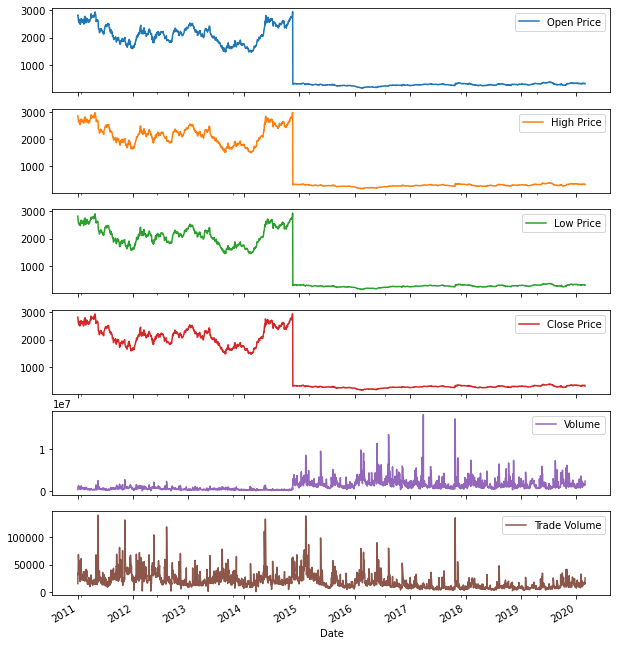

In [8]:
data.plot(subplots=True, figsize=(10,12))
plt.show()

The drastic change in price of the stock from BSE website is due to the split event on 20 Nov 2014(verified from https://moneycontrol.com), in which the face value of SBIN changes from 10 to 1 so BSE(data source) has accouted for that event and scaled the data. we willl scale the data by dividing by 10 to get the actual prices for our analysis.

In [9]:
data["2014-11-19":"2014-11-20"].tail()

Open Price  High Price  Low Price  Close Price   Volume  \
Date                                                                  
2014-11-19      2950.0      2968.0    2905.10       2911.4   306459   
2014-11-20       294.4       298.7     291.05        297.1  2921924   

            Trade Volume  
Date                      
2014-11-19         27329  
2014-11-20         63450

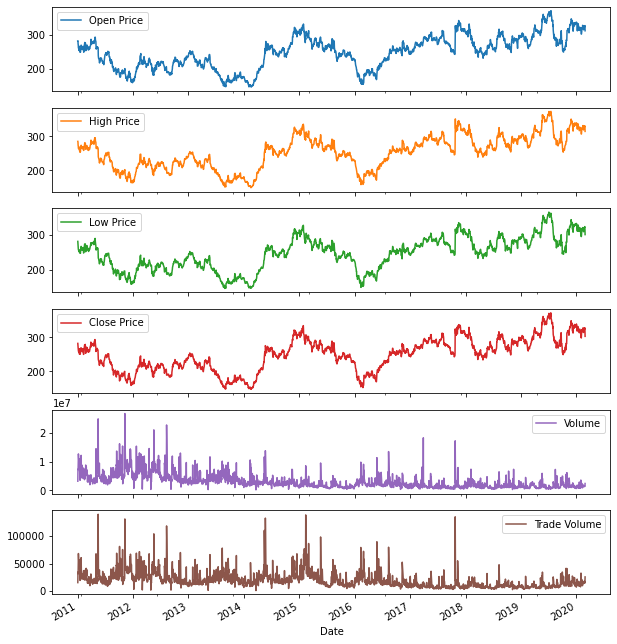

In [10]:
data['Open Price'][:"2014-11-19"] = data['Open Price'][:"2014-11-19"]/10
data['High Price'][:"2014-11-19"] = data['High Price'][:"2014-11-19"]/10
data['Low Price'][:"2014-11-19"] = data['Low Price'][:"2014-11-19"]/10
data['Close Price'][:"2014-11-19"] = data['Close Price'][:"2014-11-19"]/10
data['Volume'][:"2014-11-19"] = data['Volume'][:"2014-11-19"]*10
data.plot(subplots=True, figsize=(10,12))
plt.show()

 Extracting 2 years data for our analysis

In [11]:
data_sbin = data['2011-01-03':'2012-12-31']

We shall perform analysis on both 10 years and 2 years data of SBIN to understand the data and how parameters change with larger data

## 2. Moving Average Plots

### 2.1 Simple Moving Average

Moving Averages are used for smoothing the time series data. It helps analyse trend of the data

Simple Moving Average of Close Price for 2 years data

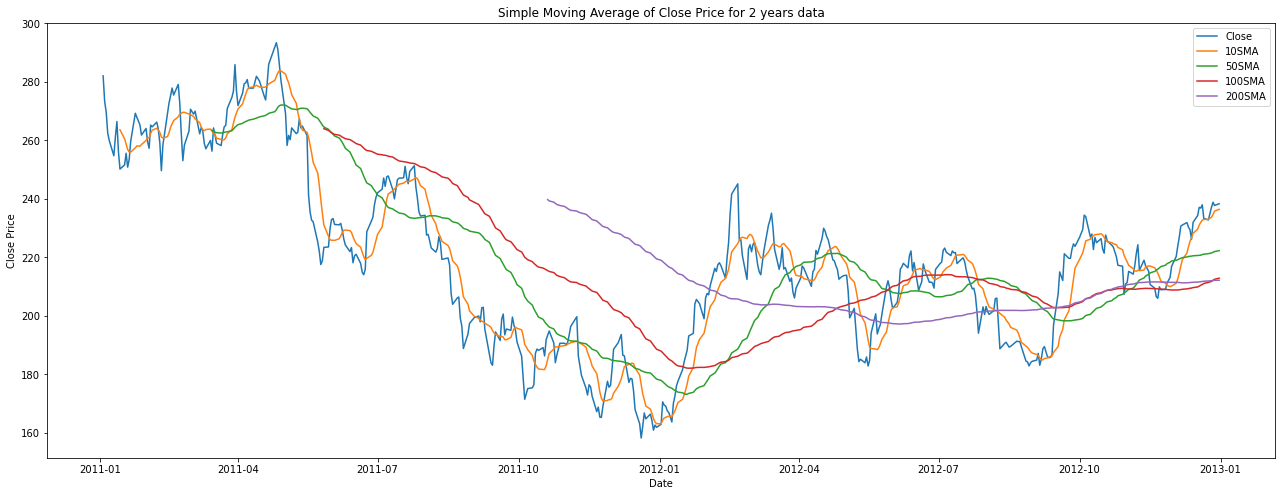

In [12]:
data_sbin['Close 10Day MA'] = data_sbin['Close Price'].rolling(window=10).mean()
data_sbin['Close 50Day MA'] = data_sbin['Close Price'].rolling(window=50).mean()
data_sbin['Close 100Day MA'] = data_sbin['Close Price'].rolling(window=100).mean()
data_sbin['Close 200Day MA'] = data_sbin['Close Price'].rolling(window=200).mean()

plt.figure(figsize=(22,8))
plt.plot(data_sbin['Close Price'], label = 'Close')
plt.plot(data_sbin['Close 10Day MA'], label = '10SMA')
plt.plot(data_sbin['Close 50Day MA'], label = '50SMA')
plt.plot(data_sbin['Close 100Day MA'], label = '100SMA')
plt.plot(data_sbin['Close 200Day MA'], label = '200SMA')
plt.legend(loc='best')
plt.title("Simple Moving Average of Close Price for 2 years data")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

Simple Moving Average of Close Price for 10 years data

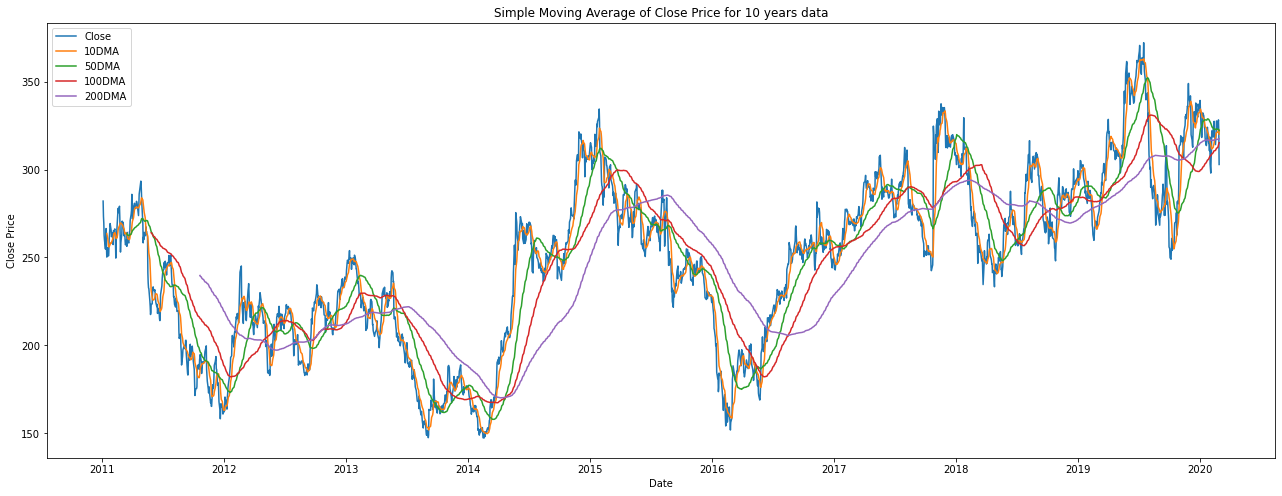

In [13]:
data['Close 10Day MA'] = data['Close Price'].rolling(window=10).mean()
data['Close 50Day MA'] = data['Close Price'].rolling(window=50).mean()
data['Close 100Day MA'] = data['Close Price'].rolling(window=100).mean()
data['Close 200Day MA'] = data['Close Price'].rolling(window=200).mean()

plt.figure(figsize=(22,8))
plt.plot(data['Close Price'], label = 'Close')
plt.plot(data['Close 10Day MA'], label = '10DMA')
plt.plot(data['Close 50Day MA'], label = '50DMA')
plt.plot(data['Close 100Day MA'], label = '100DMA')
plt.plot(data['Close 200Day MA'], label = '200DMA')
plt.legend(loc='best')
plt.title("Simple Moving Average of Close Price for 10 years data")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

In both the graphs, it is observer 10 Days Moving Average(DMA) fits best on the data detailing small variations, larger moving averages 100 and 200 gives better view of long term trend whereas smaller moving averages 10 and 50 give granular details for short term data.

### 2.2 Exponential Moving Average

Exponential moving averages is aother way to understand trend of the stock price over time, EMA is weighted moving averaging technique that gives more weight to the recent data.

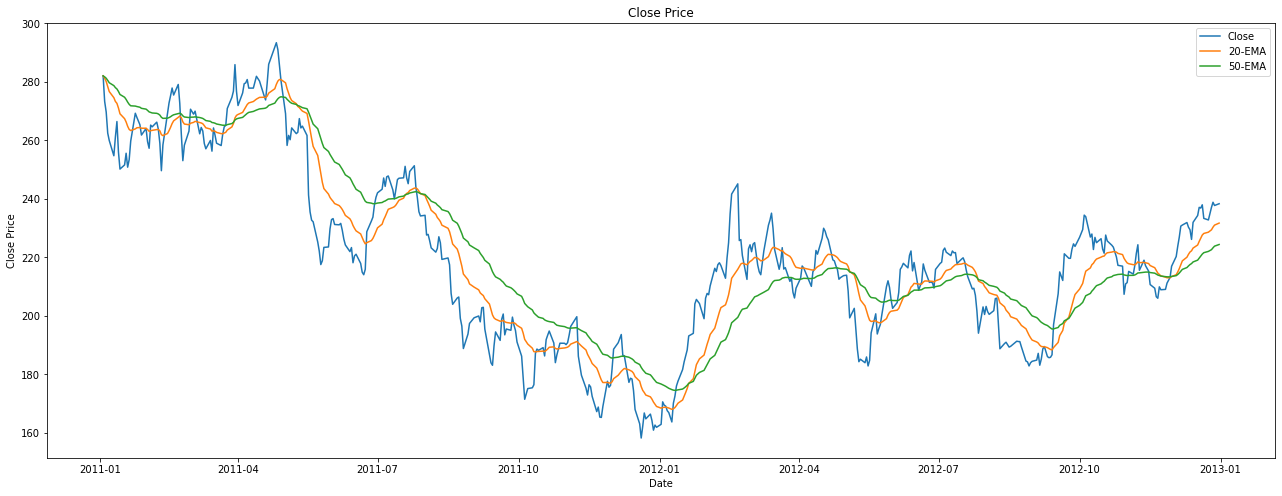

In [14]:
data_sbin['Close 20-trday EMA'] = data_sbin['Close Price'].ewm(span=20,adjust=False).mean()
data_sbin['Close 50-trday EMA'] = data_sbin['Close Price'].ewm(span=50,adjust=False).mean()
plt.figure(figsize=(22,8))
plt.plot(data_sbin['Close Price'], label = 'Close')
plt.plot(data_sbin['Close 20-trday EMA'], label = '20-EMA')
plt.plot(data_sbin['Close 50-trday EMA'], label = '50-EMA')
plt.legend(loc='best')
plt.title("Close Price")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

Like simple moving average,smaller period, 20 day EMA fits the data better than 50-EMA.

Combination of moving averages can be used to underastand trend of the data more accurately.

## 3. Lagged Time Series Plot

For stock prediction, past data is used to predict the future data of the stock, the time series is lagged by a period which can be taken as future values of the prices.

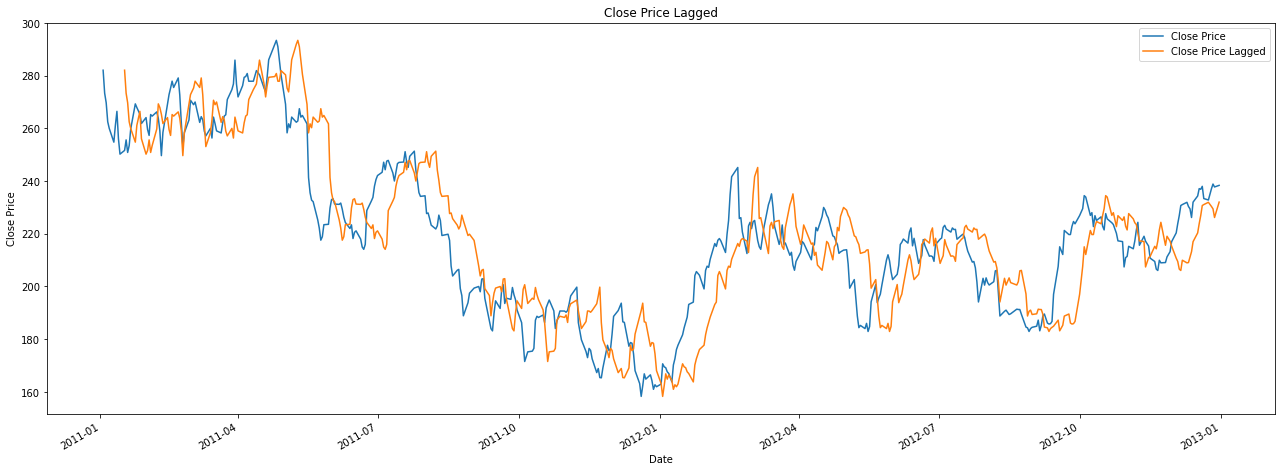

In [15]:
# referred https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook#Aim
plt.figure(figsize=(22,8))
data_sbin["Close Price"].plot(legend=True)
shifted = data_sbin["Close Price"].shift(10).plot(legend=True)
shifted.legend(['Close Price','Close Price Lagged'])
plt.title("Close Price Lagged")
plt.ylabel('Close Price')
plt.show()

Here, the relation between prices and its past values can be observed at a given time t,Here we can see that the two plots are following the same trend for over most of time and at very few points are in reverse trend, this is further analysed using autocorrelation and finding correlation at different instances.

## 4. Auto-correlation and Partial Auto-correlation of SBIN Close Price

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

The autorrelation will give us further information till how many lags the close price is significatanly correlated to its past data.

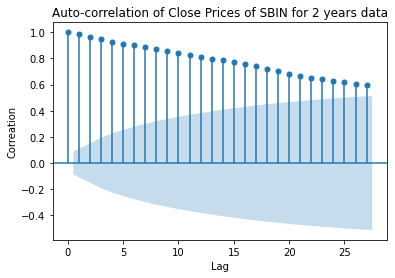

In [17]:
plot_acf(data_sbin['Close Price'])
plt.xlabel("Lag")
plt.ylabel("Correation")
plt.title("Auto-correlation of Close Prices of SBIN for 2 years data")
plt.show()

The series is significantly correlated for 25 lags.

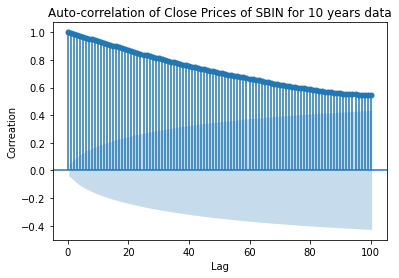

In [18]:
plot_acf(data['Close Price'], lags=100)
plt.xlabel("Lag")
plt.ylabel("Correation")
plt.title("Auto-correlation of Close Prices of SBIN for 10 years data")
plt.show()

For 10 years data, the number of sugificant lags is more than for 2 years data which implies that long term predictions can be performed if large dataset available.

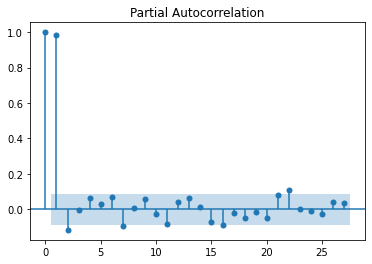

In [19]:
plot_pacf(data_sbin['Close Price'])
plt.show()

The partial autocorrelation is high for first two lags and quite low for rest of the lags.

As autcorrelation is highly significant than partial autocorrelation, we can infer that for stock prices, considering continuous data will result in beter predictions than data point at a single instance.

### 5. Understanding correlation in close price data by accounting Returns 

In [20]:
# Referred https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook#1.-Introduction-to-date-and-time
data_sbin['Return'] = data_sbin['Close Price'].pct_change().mul(100).fillna(0)
data_sbin.head(3)

Open Price  High Price  Low Price  Close Price   Volume  \
Date                                                                  
2011-01-03     283.005     285.245    281.500      282.085  3163340   
2011-01-04     283.430     283.430    272.735      273.360  7351980   
2011-01-05     273.400     273.450    268.605      269.730  7256950   

            Trade Volume  Close 10Day MA  Close 50Day MA  Close 100Day MA  \
Date                                                                        
2011-01-03         15414             NaN             NaN              NaN   
2011-01-04         34459             NaN             NaN              NaN   
2011-01-05         31719             NaN             NaN              NaN   

            Close 200Day MA  Close 20-trday EMA  Close 50-trday EMA    Return  
Date                                                                           
2011-01-03              NaN          282.085000          282.085000  0.000000  
2011-01-04              NaN          281.254048          281.742843 -3.093039  
2011-01-05              NaN          280.156519          281.271751 -1.327919

In [21]:
data['Return'] = data['Close Price'].pct_change().mul(100).fillna(0)

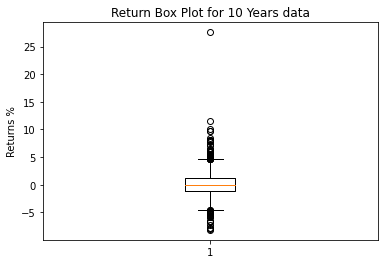

In [22]:
plt.boxplot(data['Return'])
plt.title("Return Box Plot for 10 Years data")
plt.ylabel("Returns %")
plt.show()

Here we can se, most o the returns lie in +/-5% range, with few returns outside this range. However one return is significantly larger than others, let's examine the data point.

In [23]:
data.loc[data['Return']>20]

Open Price  High Price  Low Price  Close Price    Volume  \
Date                                                                   
2017-10-25      279.95       328.0     279.95        324.7  17296060   

            Trade Volume  Close 10Day MA  Close 50Day MA  Close 100Day MA  \
Date                                                                        
2017-10-25        134735          257.07         266.905         278.5065   

            Close 200Day MA     Return  
Date                                    
2017-10-25        277.91125  27.583497

As the stock prices are dependent on a lot of external features, external seraches for the date were required to check what lead to the surge in price.
After, Search on https:moneycontrol.com no corporate action were found on or near this date ehich may cause this result.
After Seraching for keywords on google "25 oct 2017 india stock market sbin" i was found out that the price surge was caused as govt announced a plan for PSU banks(ref: https://www.livemint.com/Money/zEOPL7wRuPbHFsgt7BQlVI/PSU-banks-stocks-rally-on-recapitalisation-plans-SBI-PNB-s.html)
This tells us that such events need to be considered, however accounting for news is a great deal, so for this case study we will try to take this into account by cosidering peer companies data for SBIN stock which is analysed later.

In [24]:
print(data['Return'].describe())

count    2269.000000
mean        0.024620
std         2.088874
min        -8.189978
25%        -1.167221
50%        -0.010457
75%         1.139008
max        27.583497
Name: Return, dtype: float64


In [25]:
print("99% quantile:",data['Return'].quantile(0.99))
print("95% quantile:",data['Return'].quantile(0.95))
print("90% quantile:",data['Return'].quantile(0.90))
print("10% quantile:",data['Return'].quantile(0.10))
print("5% quantile:",data['Return'].quantile(0.5))
print("1% quantile:",data['Return'].quantile(0.01))

99% quantile: 5.467985895065609
95% quantile: 3.2303172014189125
90% quantile: 2.365677426282109
10% quantile: -2.295880723057786
5% quantile: -0.010456696206839755
1% quantile: -4.847094502951107


here we can see approx 99% of returns lie in the range +/-5%, so this can be a good threshold to analyse the patterns near signifcantly higher and lower returns.

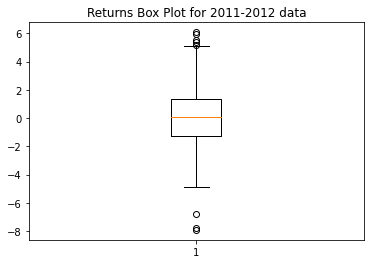

In [26]:
plt.boxplot(data_sbin['Return'])
plt.title("Returns Box Plot for 2011-2012 data")
plt.show()

In [27]:
print(data_sbin['Return'].describe())

count    498.000000
mean      -0.012383
std        2.068897
min       -7.910676
25%       -1.245273
50%        0.090920
75%        1.325766
max        6.070478
Name: Return, dtype: float64


In [28]:
print("99% quantile:",data_sbin['Return'].quantile(0.99))
print("95% quantile:",data_sbin['Return'].quantile(0.95))
print("90% quantile:",data_sbin['Return'].quantile(0.90))
print("10% quantile:",data_sbin['Return'].quantile(0.10))
print("5% quantile:",data_sbin['Return'].quantile(0.5))
print("1% quantile:",data_sbin['Return'].quantile(0.01))

99% quantile: 5.101117720463336
95% quantile: 3.3912213426754105
90% quantile: 2.3868494641886238
10% quantile: -2.728648341631095
5% quantile: 0.09091956134141821
1% quantile: -4.433707018366716


In [29]:
return_threshold = 5.0
data_sbin['is_return_high'] = np.where(data_sbin['Return']>return_threshold,1,0)
data_sbin['is_return_low'] = np.where(data_sbin['Return']<-return_threshold,1,0)
data['is_return_high'] = np.where(data['Return']>return_threshold,1,0)
data['is_return_low'] = np.where(data['Return']<-return_threshold,1,0)

In [30]:
print(data['is_return_high'].sum())
print(data['is_return_low'].sum())
print(data_sbin['is_return_high'].sum())
print(data_sbin['is_return_low'].sum())

35
18
7
3


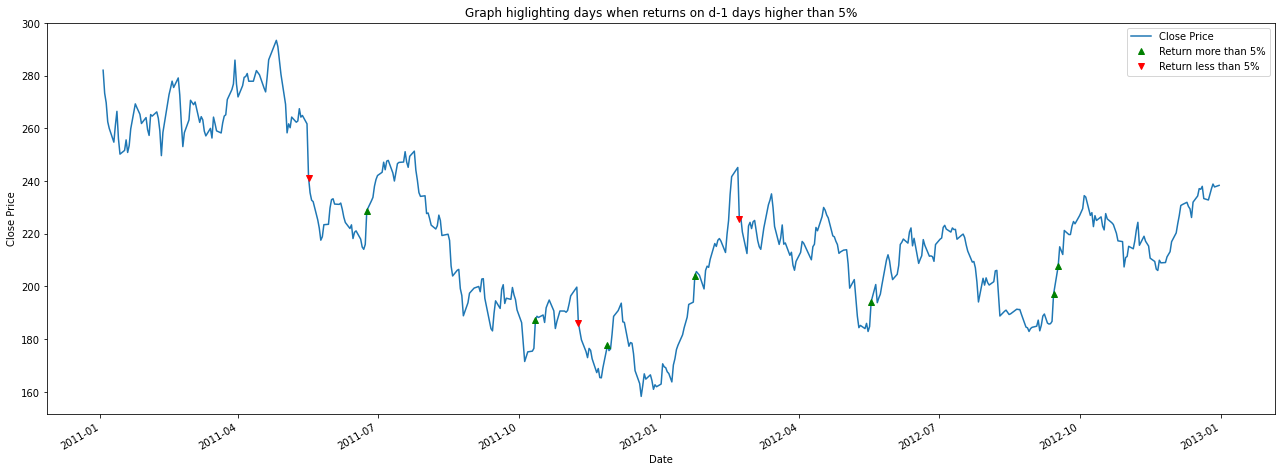

In [31]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 5%")
plt.plot(data_sbin[data_sbin['is_return_low'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 5%")
plt.ylabel("Close Price")
plt.title("Graph higlighting days when returns on d-1 days higher than 5%")
plt.legend()
plt.show()

In [32]:
data_sbin['Return_d-2'] = data_sbin['Close Price'].pct_change(2).mul(100).fillna(0)
data_sbin['Return_d-3'] = data_sbin['Close Price'].pct_change(3).mul(100).fillna(0)
data_sbin['Return_d-4'] = data_sbin['Close Price'].pct_change(4).mul(100).fillna(0)
data_sbin['Return_d-5'] = data_sbin['Close Price'].pct_change(5).mul(100).fillna(0)
data_sbin.tail(2)

Open Price  High Price  Low Price  Close Price   Volume  \
Date                                                                  
2012-12-28       238.0      239.89    236.820      237.775  2059890   
2012-12-31       237.0      239.59    236.755      238.375  1847010   

            Trade Volume  Close 10Day MA  Close 50Day MA  Close 100Day MA  \
Date                                                                        
2012-12-28          9828         235.838        222.0237         212.5558   
2012-12-31          8397         236.474        222.3333         212.9249   

            Close 200Day MA  Close 20-trday EMA  Close 50-trday EMA    Return  \
Date                                                                            
2012-12-28       212.191425          231.062827          223.872222 -0.462575   
2012-12-31       212.219475          231.759225          224.440958  0.252339   

            is_return_high  is_return_low  Return_d-2  Return_d-3  Return_d-4  \
Date                                                                            
2012-12-28               0              0    0.276231    2.123867    1.887561   
2012-12-31               0              0   -0.211403    0.529268    2.381566   

            Return_d-5  
Date                    
2012-12-28   -0.098735  
2012-12-31    2.144663

In [33]:
# threshold is taken such that lower number of datapoints are obtained for each case
return_threshold = 7.5
data_sbin['is_return_high_d-2'] = np.where(data_sbin['Return_d-2']>return_threshold,1,0)
data_sbin['is_return_low_d-2'] = np.where(data_sbin['Return_d-2']<-return_threshold,1,0)
return_threshold = 10.0
data_sbin['is_return_high_d-3'] = np.where(data_sbin['Return_d-3']>return_threshold,1,0)
data_sbin['is_return_low_d-3'] = np.where(data_sbin['Return_d-3']<-return_threshold,1,0)

data_sbin['is_return_high_d-4'] = np.where(data_sbin['Return_d-4']>return_threshold,1,0)
data_sbin['is_return_low_d-4'] = np.where(data_sbin['Return_d-4']<-return_threshold,1,0)

data_sbin['is_return_high_d-5'] = np.where(data_sbin['Return_d-5']>return_threshold,1,0)
data_sbin['is_return_low_d-5'] = np.where(data_sbin['Return_d-5']<-return_threshold,1,0)

In [34]:
print(data_sbin['is_return_high_d-2'].sum())
print(data_sbin['is_return_low_d-2'].sum())
print(data_sbin['is_return_high_d-3'].sum())
print(data_sbin['is_return_low_d-3'].sum())
print(data_sbin['is_return_high_d-4'].sum())
print(data_sbin['is_return_low_d-4'].sum())
print(data_sbin['is_return_high_d-5'].sum())
print(data_sbin['is_return_low_d-5'].sum())

6
8
3
4
8
9
17
15


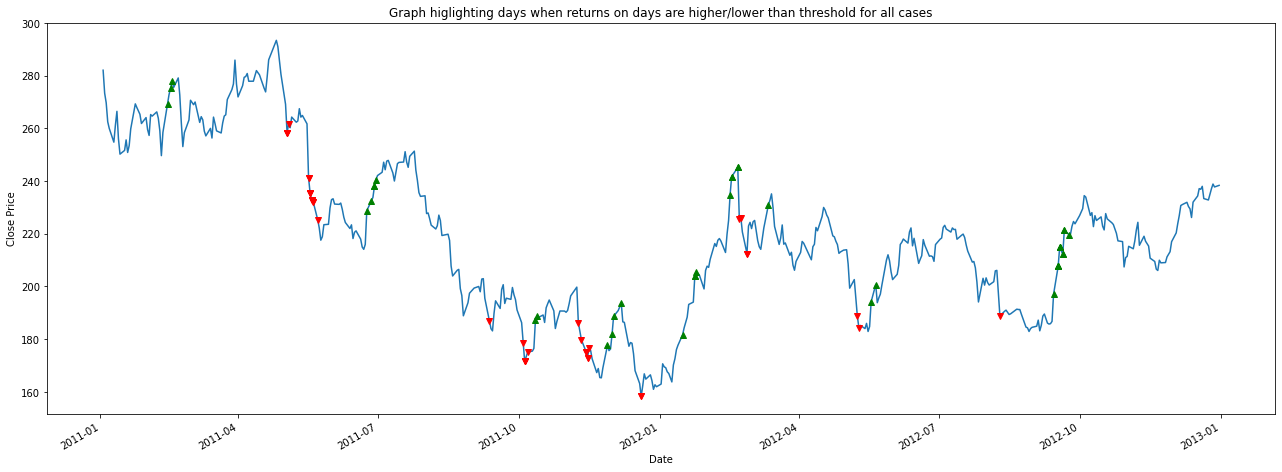

In [35]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 5%")
plt.plot(data_sbin[data_sbin['is_return_low'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 5%")
plt.plot(data_sbin[data_sbin['is_return_high_d-2'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 7.5%")
plt.plot(data_sbin[data_sbin['is_return_low_d-2'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 7.5%")
plt.plot(data_sbin[data_sbin['is_return_high_d-3'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-3'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.plot(data_sbin[data_sbin['is_return_high_d-4'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-4'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.plot(data_sbin[data_sbin['is_return_high_d-5'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-5'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.title("Graph higlighting days when returns on days are higher/lower than threshold for all cases")
plt.ylabel('Close Price')
plt.show()

Examining The Graphs Separetly for each Case

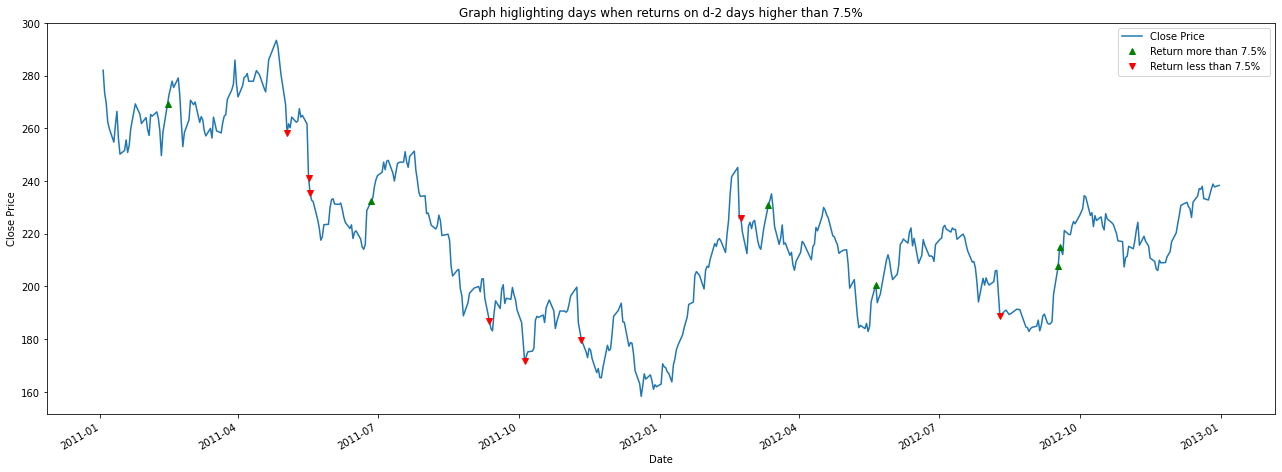

In [36]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high_d-2'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 7.5%")
plt.plot(data_sbin[data_sbin['is_return_low_d-2'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 7.5%")
plt.title("Graph higlighting days when returns on d-2 days higher than 7.5%")
plt.ylabel('Close Price')
plt.legend()
plt.show()

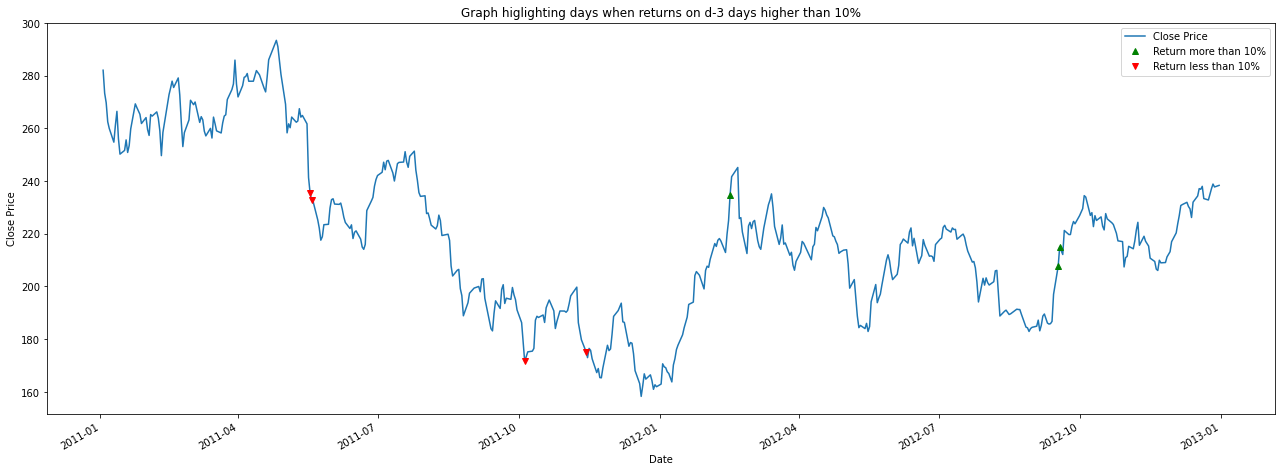

In [37]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high_d-3'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-3'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.title("Graph higlighting days when returns on d-3 days higher than 10%")
plt.legend()
plt.ylabel('Close Price')
plt.show()

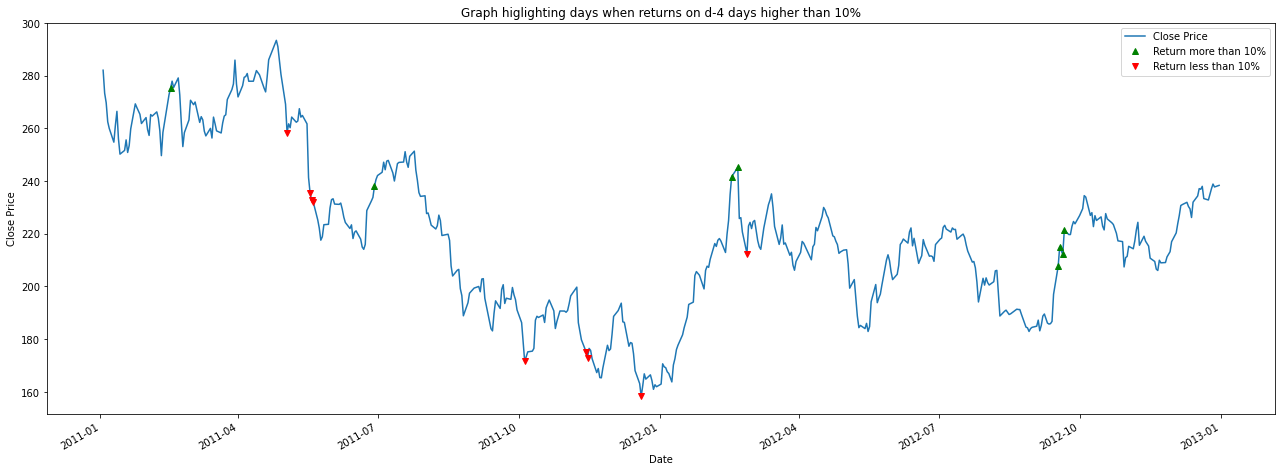

In [38]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high_d-4'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-4'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.title("Graph higlighting days when returns on d-4 days higher than 10%")
plt.legend()
plt.ylabel('Close Price')
plt.show()

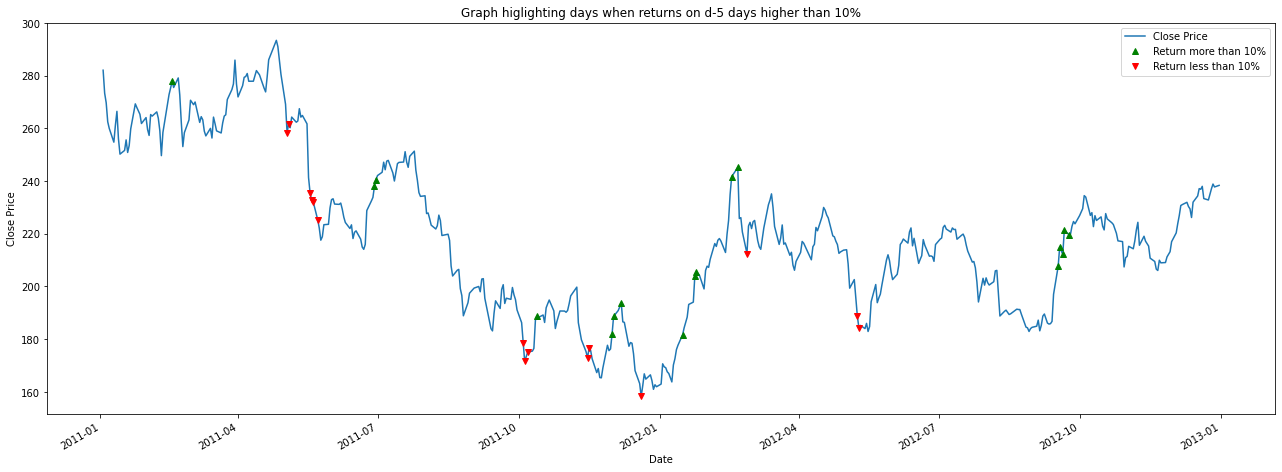

In [39]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot()
plt.plot(data_sbin[data_sbin['is_return_high_d-5'] == 1]['Close Price'],marker='^', color='g',linewidth=0,label="Return more than 10%")
plt.plot(data_sbin[data_sbin['is_return_low_d-5'] == 1]['Close Price'],marker='v', color='r',linewidth=0, label="Return less than 10%")
plt.title("Graph higlighting days when returns on d-5 days higher than 10%")
plt.legend()
plt.ylabel('Close Price')
plt.show()

In all the graphs it can be observed that a significant moment is there in the price for neear the events marked, further we subset the data for +/- 15 working days from these points to check the correlation between this data 

#### Analysing graphs for +/- 15 days before and after return high and low date 

##### For 1 Day Returns

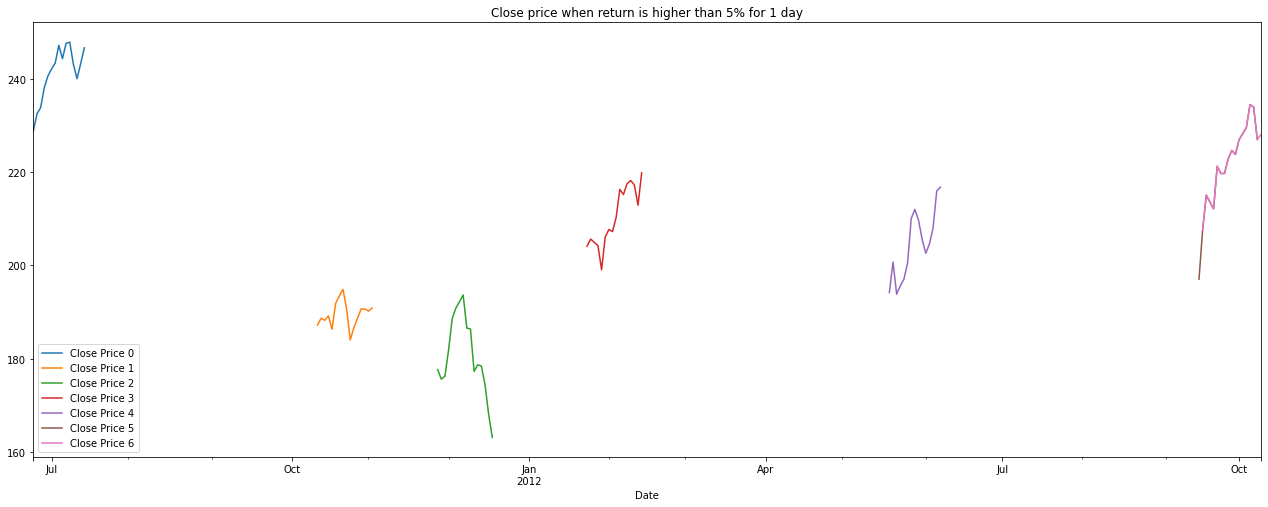

In [40]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_high'] ==1]
subset_high_d1 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_high_d1.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_high_d1[i].set_index(['Date'],inplace=True)
    subset_high_d1[i]['Close Price'].plot(label = "Close Price "+str(i))
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price when return is higher than 5% for 1 day")
plt.show()

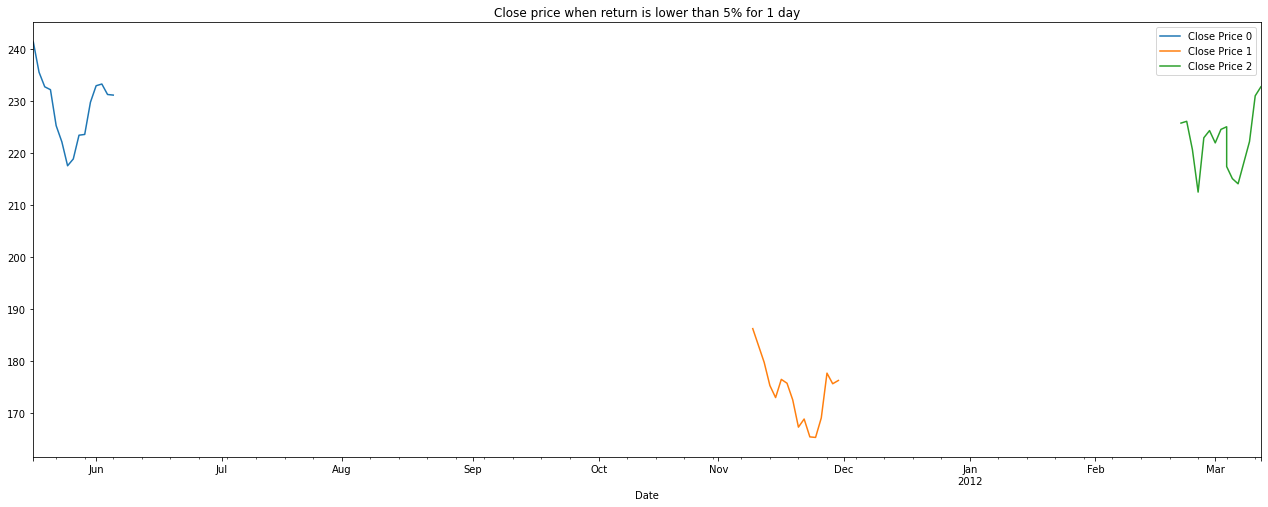

In [41]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_low'] ==1]
subset_low_d1 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_low_d1.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_low_d1[i].set_index(['Date'],inplace=True)
    subset_low_d1[i]['Close Price'].plot(label = "Close Price "+str(i))
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price when return is lower than 5% for 1 day")
plt.show()

For 1 day, we can observer for both cases the graphs seem to have similar patterns

##### For 2 days returns

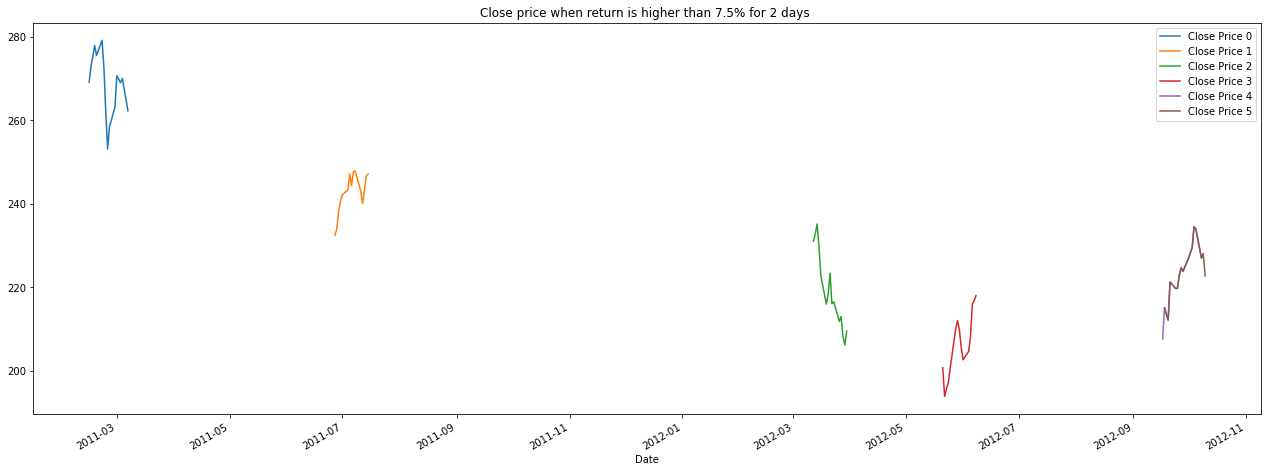

In [42]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_high_d-2'] ==1]
subset_high_d2 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_high_d2.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_high_d2[i].set_index(['Date'],inplace=True)
    subset_high_d2[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price when return is higher than 7.5% for 2 days ")
plt.show()

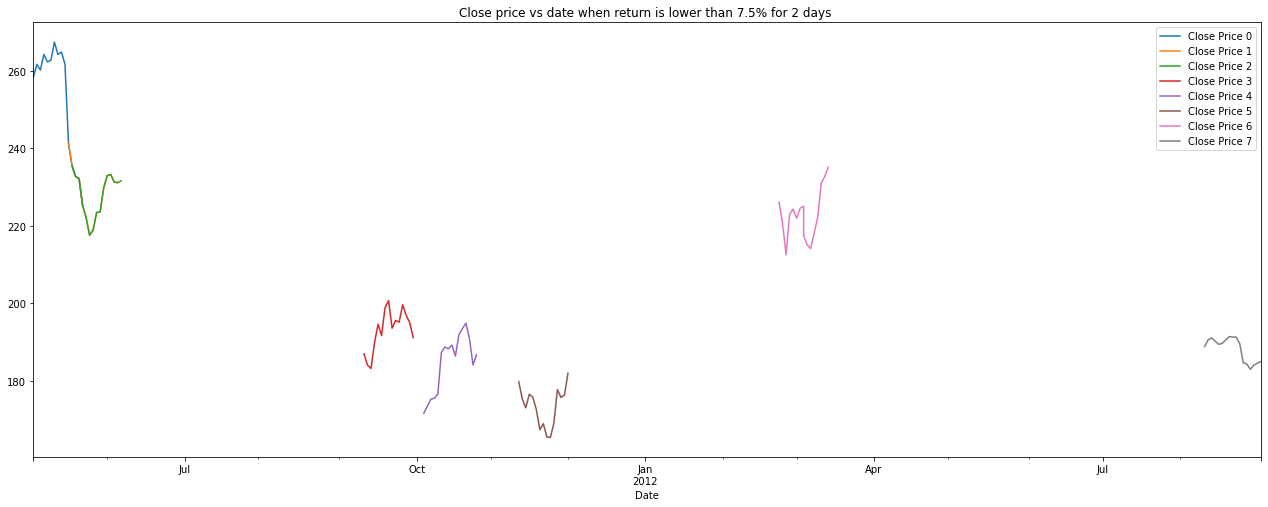

In [43]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_low_d-2'] ==1]
subset_low_d2 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_low_d2.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_low_d2[i].set_index(['Date'],inplace=True)
    subset_low_d2[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is lower than 7.5% for 2 days ")
plt.show()

For 2 days returns, we can observer for both cases all the graphs do not seems to follow any 
pattern visually.

##### For 3 day returns

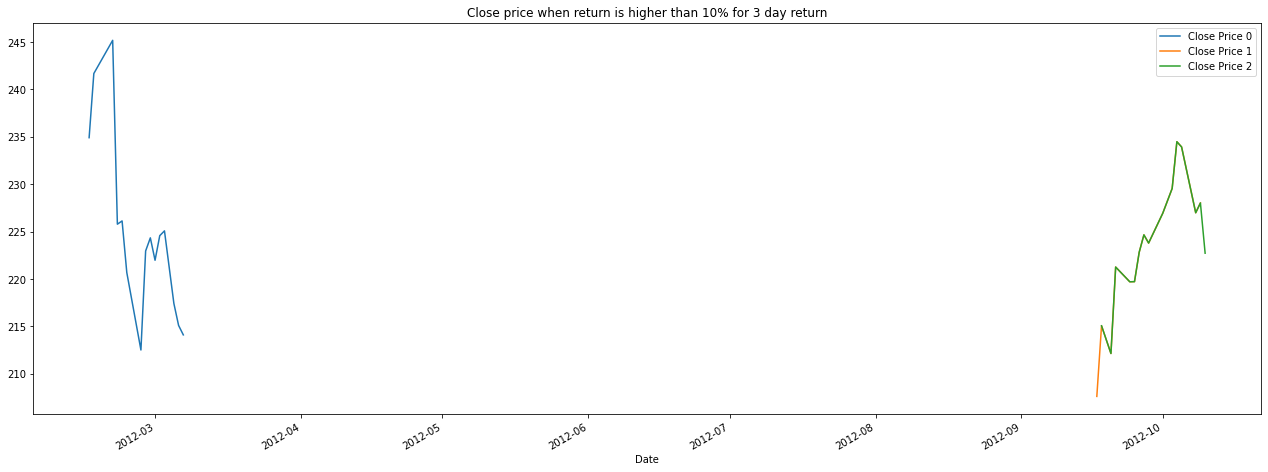

In [44]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_high_d-3'] ==1]
subset_high_d3 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_high_d3.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_high_d3[i].set_index(['Date'],inplace=True)
    subset_high_d3[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price when return is higher than 10% for 3 day return")
plt.show()

A big jump is observed in all the graphs

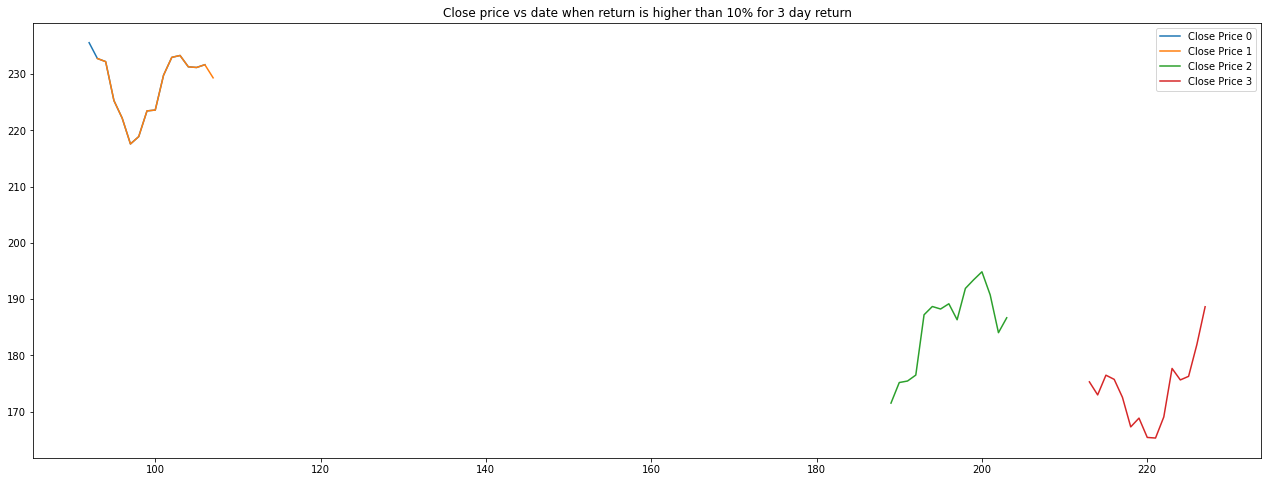

In [45]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_low_d-3'] ==1]
subset_low_d3 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_low_d3.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_low_d3[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is higher than 10% for 3 day return")
plt.show()

For 3 days returns, similar patterns can be observed in all graphs.

##### For 4 day returns

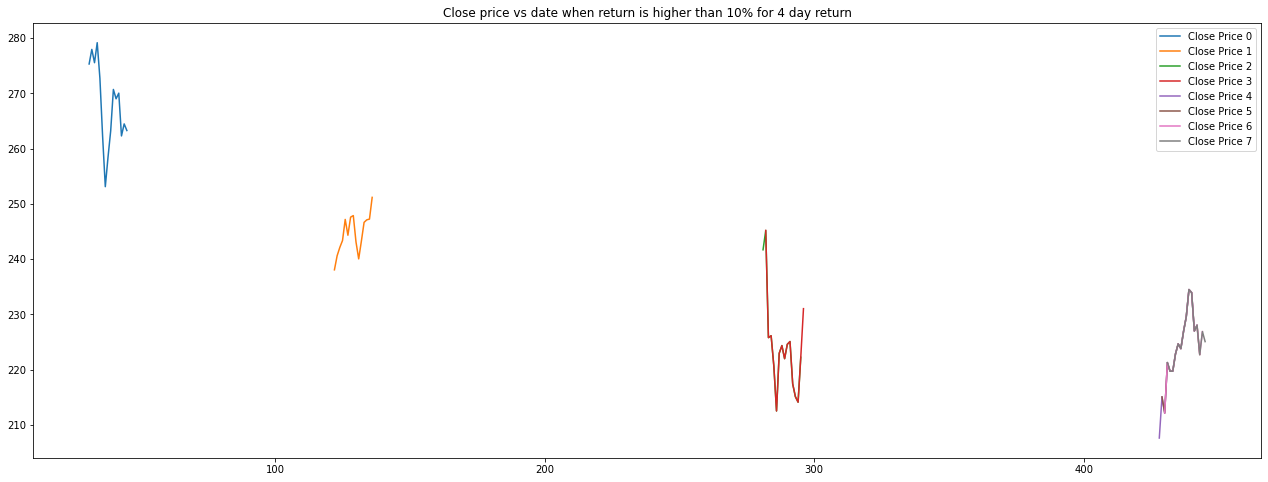

In [46]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_high_d-4'] ==1]
subset_high_d4 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_high_d4.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_high_d4[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is higher than 10% for 4 day return")
plt.show()

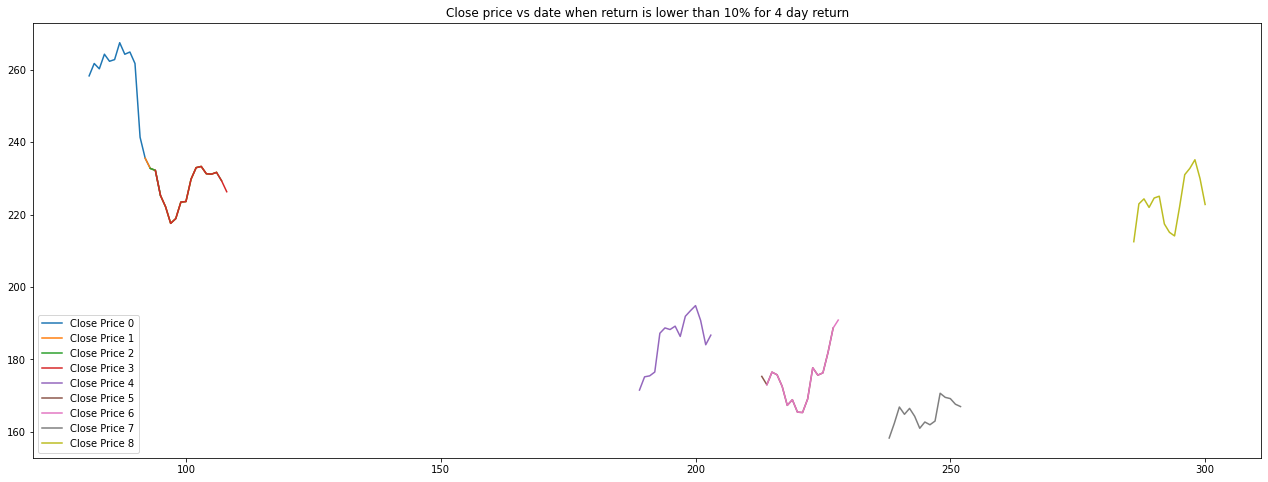

In [47]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_low_d-4'] ==1]
subset_low_d4 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_low_d4.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_low_d4[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is lower than 10% for 4 day return")
plt.show()

##### For 5 day returns

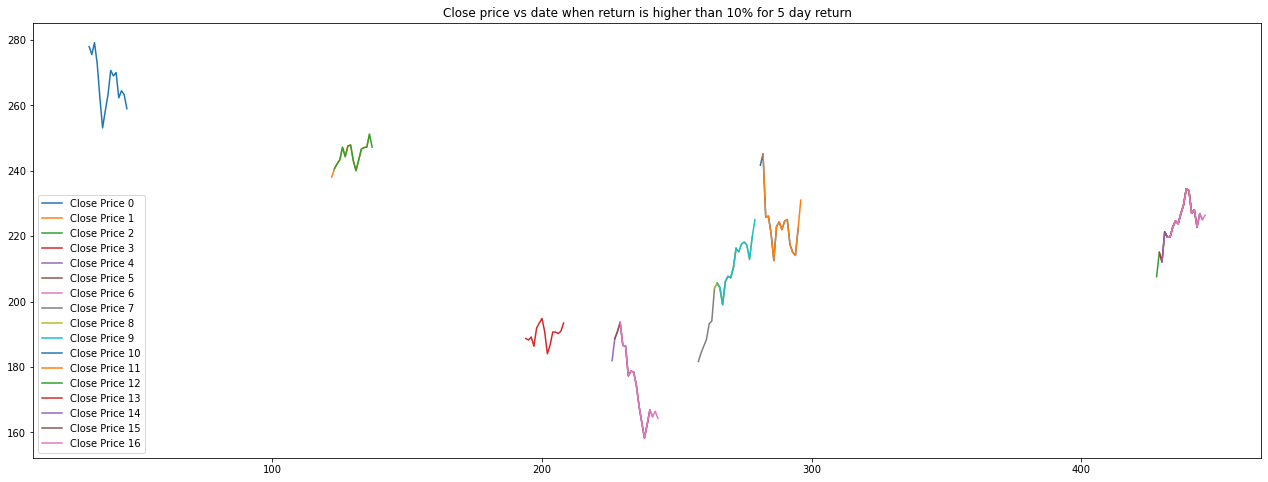

In [48]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_high_d-5'] ==1]
subset_high_d5 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_high_d5.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_high_d5[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is higher than 10% for 5 day return")
plt.show()

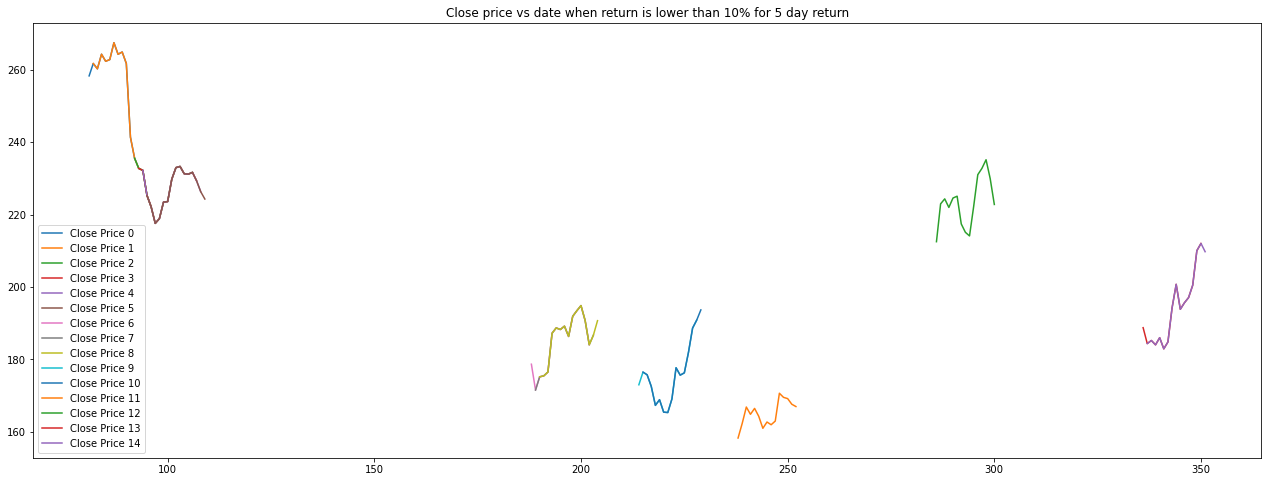

In [49]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_return_low_d-5'] ==1]
subset_low_d5 = []
plt.figure(figsize=(22,8))
for i in range(len(list_)):
    subset_low_d5.append(data_sbin[list_[i]:list_[i]+lag].copy())
    subset_low_d5[i]['Close Price'].plot(label = "Close Price "+str(i)) 
data_sbin.set_index(['Date'],inplace=True)
plt.legend()
plt.title("Close price vs date when return is lower than 10% for 5 day return")
plt.show()

#### Calculating correlation for all the cases of high and low returns

In [50]:
from statsmodels.tsa.stattools import ccf
from scipy.stats import pearsonr

##### For 1 day returns

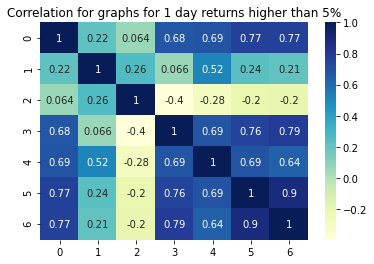

In [51]:
ccf_high_d1 = []
for i in range(len(subset_high_d1)):
    ccf_ = []
    for j in range(len(subset_high_d1)):
        ccf_.append(ccf(subset_high_d1[i]['Close Price'],subset_high_d1[j]['Close Price'])[0])
    ccf_high_d1.append(ccf_)
sns.heatmap(ccf_high_d1,annot=True,cmap="YlGnBu") 
plt.title("Correlation for graphs for 1 day returns higher than 5%")
plt.show()

For most of the value correlation is >5 which indicates that there is strong relationship between the graphs and it can be implied similar features in past data exhibit similar behaviours in future

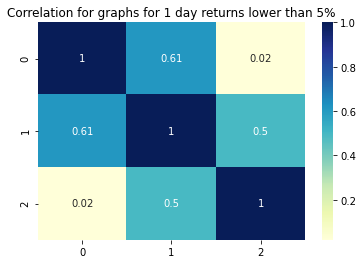

In [52]:
ccf_low_d1 = []
for i in range(len(subset_low_d1)):
    ccf_ = []
    for j in range(len(subset_low_d1)):
        ccf_.append(ccf(subset_low_d1[i]['Close Price'],subset_low_d1[j]['Close Price'])[0])
    ccf_low_d1.append(ccf_)
sns.heatmap(ccf_low_d1,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 1 day returns lower than 5%")
plt.show()

For this case the graphs are not higly correlated

##### For 2 day returns

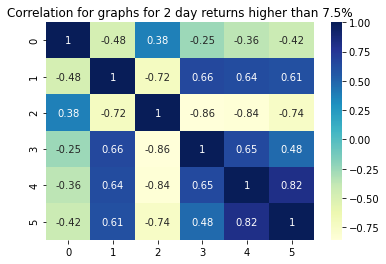

In [53]:
ccf_high_d2 = []
for i in range(len(subset_high_d2)):
    ccf_ = []
    for j in range(len(subset_high_d2)):
        ccf_.append(ccf(subset_high_d2[i]['Close Price'],subset_high_d2[j]['Close Price'])[0])
    ccf_high_d2.append(ccf_)
sns.heatmap(ccf_high_d2,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 2 day returns higher than 7.5%")
plt.show()

Most of the graphs have correlation > +/-0.5. The negative correlation implies reverse trend but wit similar momentum is present.

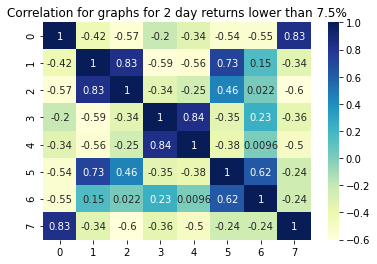

In [54]:
ccf_low_d2 = []
for i in range(len(subset_low_d2)):
    ccf_ = []
    for j in range(len(subset_low_d2)):
        ccf_.append(ccf(subset_low_d2[i]['Close Price'],subset_low_d2[j]['Close Price'])[0])
    ccf_low_d2.append(ccf_)
sns.heatmap(ccf_low_d2,annot=True,cmap="YlGnBu")
plt.title("Correlation for graphs for 2 day returns lower than 7.5%")
plt.show()

Only a few graphs are correlated, most of the graphs have low correlation values.

##### For 3 day returns

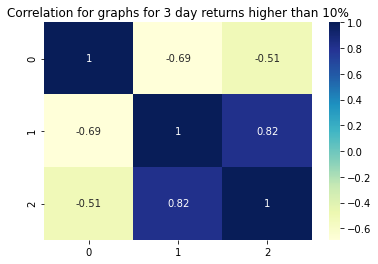

In [55]:
ccf_high_d3 = []
for i in range(len(subset_high_d3)):
    ccf_ = []
    for j in range(len(subset_high_d3)):
        ccf_.append(ccf(subset_high_d3[i]['Close Price'],subset_high_d3[j]['Close Price'])[0])
    ccf_high_d3.append(ccf_)
sns.heatmap(ccf_high_d3,annot=True,cmap="YlGnBu") 
plt.title("Correlation for graphs for 3 day returns higher than 10%")
plt.show()

The graphs have correlation > +/- 0.5

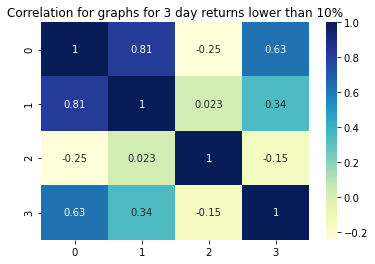

In [56]:
ccf_low_d3 = []
for i in range(len(subset_low_d3)):
    ccf_ = []
    for j in range(len(subset_low_d3)):
        ccf_.append(ccf(subset_low_d3[i]['Close Price'],subset_low_d3[j]['Close Price'])[0])
    ccf_low_d3.append(ccf_)
sns.heatmap(ccf_low_d3,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 3 day returns lower than 10%")
plt.show()

Most of the graphs are not significantly correlated.

##### For 4 day returns

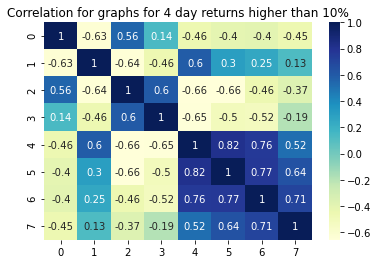

In [57]:
ccf_high_d4 = []
for i in range(len(subset_high_d4)):
    ccf_ = []
    for j in range(len(subset_high_d4)):
        ccf_.append(ccf(subset_high_d4[i]['Close Price'],subset_high_d4[j]['Close Price'])[0])
    ccf_high_d4.append(ccf_)
sns.heatmap(ccf_high_d4,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 4 day returns higher than 10%")
plt.show()

Few graphs are highly correlated while few are not.

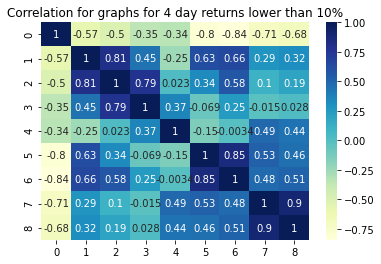

In [58]:
ccf_low_d4 = []
for i in range(len(subset_low_d4)):
    ccf_ = []
    for j in range(len(subset_low_d4)):
        ccf_.append(ccf(subset_low_d4[i]['Close Price'],subset_low_d4[j]['Close Price'])[0])
    ccf_low_d4.append(ccf_)
sns.heatmap(ccf_low_d4,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 4 day returns lower than 10%")
plt.show()

Only a few graphs are highly correlated while most are not.

##### For 5 day returns

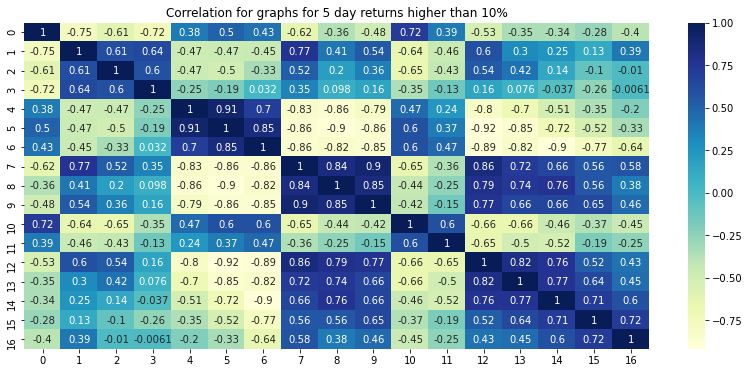

In [59]:
ccf_high_d5 = []
for i in range(len(subset_high_d5)):
    ccf_ = []
    for j in range(len(subset_high_d5)):
        ccf_.append(ccf(subset_high_d5[i]['Close Price'],subset_high_d5[j]['Close Price'])[0])
    ccf_high_d5.append(ccf_)
plt.figure(figsize=(14,6))
sns.heatmap(ccf_high_d5,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 5 day returns higher than 10%")
plt.show()

The graphs seem to be both positively and negatively correlated.

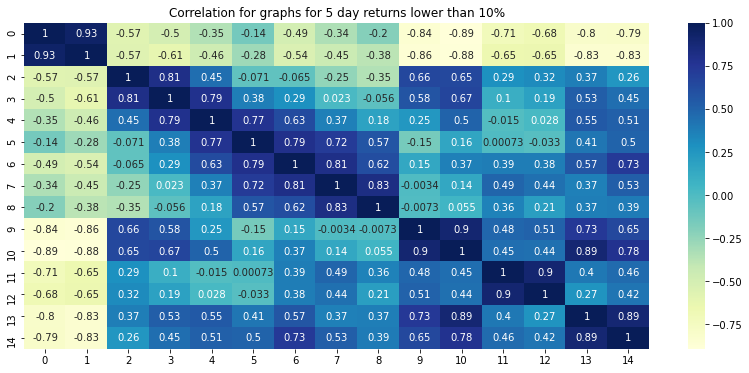

In [60]:
ccf_low_d5 = []
for i in range(len(subset_low_d5)):
    ccf_ = []
    for j in range(len(subset_low_d5)):
        ccf_.append(ccf(subset_low_d5[i]['Close Price'],subset_low_d5[j]['Close Price'])[0])
    ccf_low_d5.append(ccf_)
plt.figure(figsize=(14,6))
sns.heatmap(ccf_low_d5,annot=True,cmap="YlGnBu")  
plt.title("Correlation for graphs for 5 day returns lower than 10%")
plt.show()

Most of the graphs are significantly correlated.

# 6. Analysing Data Near Events of SBIN Stock

Event Dates are taken from the SBI official website.
https://www.sbigroup.co.jp/english/investors/calendar/ and https://www.bseindia.com/corporates/corporates_act.html?scripcode=500112&scripname=STATE%20BANK%20OF%20INDIA


In [61]:
sbin_eventdates = pd.read_csv("./data/sbi_eventdates.csv", index_col='Date', parse_dates=['Date'])

In [62]:
sbin_eventdates.shape

(30, 3)

In [63]:
sbin_eventdates

Year                                              Event  \
Date                                                                  
2012-11-27  2012                                Information Meeting   
2012-03-12  2012                                Information Meeting   
2012-08-11  2012  Financial Results Presentation for Second Quar...   
2012-08-11  2012  Financial Results for Second Quarter of FY End...   
2012-09-08  2012  Financial Results Presentation for First Quart...   
2012-09-08  2012  Financial Results for First Quarter of FY Ende...   
2012-06-28  2012               14th General Meeting of Stockholders   
2012-06-28  2012                 Briefing on Latest Management News   
2012-05-24  2012                           Dividend - Rs. - 35.0000   
2012-05-28  2012                                Information Meeting   
2012-01-06  2012                                                NaN   
2012-04-27  2012  Financial Results Presentation for FY Ended Ma...   
2012-04-27  2012      Financial Results for FY Ended March 31, 2012   
2012-01-31  2012  Financial Results Presentation for Third Quart...   
2012-01-31  2012  Financial Results for Third Quarter of FY Ende...   
2011-11-28  2011                                Information Meeting   
2011-01-12  2011                                Information Meeting   
2011-10-26  2011  Financial Results Presentation for Second Quar...   
2011-10-26  2011  Financial Results for Second Quarter of FY End...   
2011-07-28  2011  Financial Results Presentation for First Quart...   
2011-07-28  2011  Financial Results for First Quarter of FY Ende...   
2011-08-29  2011               13th General Meeting of Stockholders   
2011-08-29  2011                 Briefing on Latest Management News   
2011-05-20  2011                           Dividend - Rs. - 30.0000   
2011-05-31  2011                                Information Meeting   
2011-02-06  2011                                                NaN   
2011-04-27  2011  Financial Results Presentation for FY Ended Ma...   
2011-04-27  2011      Financial Results for FY Ended March 31, 2011   
2011-01-26  2011  Financial Results Presentation for Third Quart...   
2011-01-26  2011  Financial Results for Third Quarter of FY Ende...   

                        Type  
Date                          
2012-11-27   General meeting  
2012-03-12   General meeting  
2012-08-11  Quarterly result  
2012-08-11  Quarterly result  
2012-09-08  Quarterly result  
2012-09-08  Quarterly result  
2012-06-28   General meeting  
2012-06-28   General meeting  
2012-05-24          Dividend  
2012-05-28   General meeting  
2012-01-06   General meeting  
2012-04-27  Quarterly result  
2012-04-27  Quarterly result  
2012-01-31  Quarterly result  
2012-01-31  Quarterly result  
2011-11-28   General meeting  
2011-01-12   General meeting  
2011-10-26  Quarterly result  
2011-10-26  Quarterly result  
2011-07-28  Quarterly result  
2011-07-28  Quarterly result  
2011-08-29   General meeting  
2011-08-29   General meeting  
2011-05-20          Dividend  
2011-05-31   General meeting  
2011-02-06   General meeting  
2011-04-27  Quarterly result  
2011-04-27  Quarterly result  
2011-01-26  Quarterly result  
2011-01-26  Quarterly result

In [64]:
data_sbin.reset_index(inplace=True)
sbin_eventdates.reset_index(inplace=True)
eventdates = sbin_eventdates[sbin_eventdates['Date'].isin(data_sbin['Date'])]['Date']
data_sbin.set_index(['Date'],inplace=True)

In [65]:
data_sbin['is_event'] = 0
data_sbin['is_event'] = data_sbin['is_event'].astype('int8')
for i in eventdates:
    data_sbin.at[i, "is_event"] = 1

In [66]:
sbin_eventdates.insert(0, "Id", range(1,1+len(sbin_eventdates)))

data_sbin = data_sbin.merge(sbin_eventdates[['Id']], how='left',left_index=True, right_index=True)

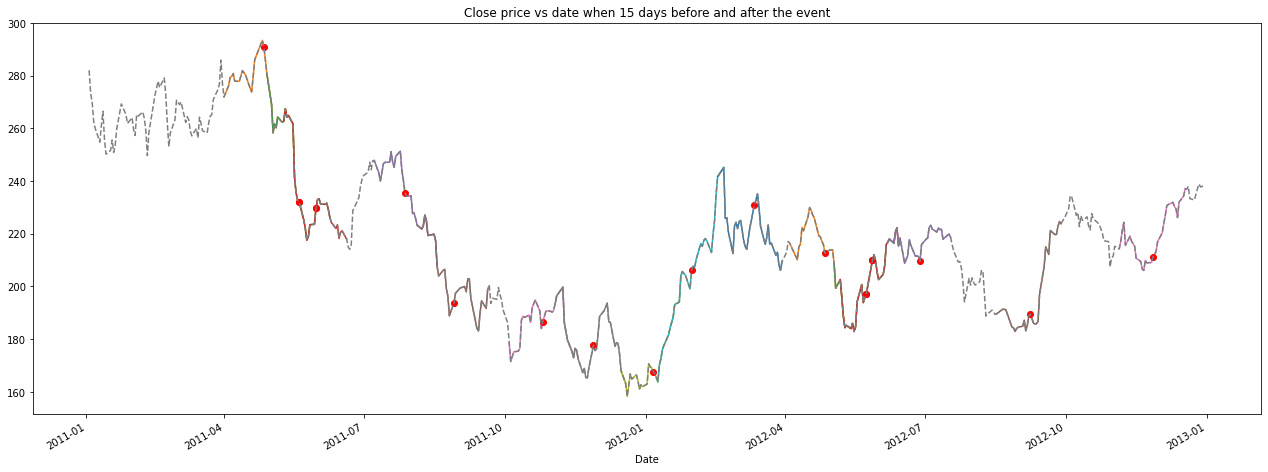

In [67]:
lag = 15
data_sbin.reset_index(inplace=True)
list_ = data_sbin.index[data_sbin['is_event'] ==1]
subset_event_1 = []
subset_event_2 = []
plt.figure(figsize=(22,8))

for i in range(len(list_)):
    subset_event_1.append(data_sbin[list_[i]-lag:list_[i]+lag].copy())
    subset_event_1[i].set_index(['Date'],inplace=True)
    subset_event_1[i]['Close Price'].plot(label = "Close Price "+str(i)) 
    plt.plot(subset_event_1[i][subset_event_1[i]['is_event'] == 1]['Close Price'],marker='o', color='r',linewidth=0,label="event day")
data_sbin.set_index(['Date'],inplace=True)
plt.plot(data_sbin['Close Price'],"--")
plt.title("Close price vs date when "+str(lag)+" days before and after the event")
plt.show()

It can be observed that near most of the events, the stock price fluctuation is significant.

# 7. Analysis of SBIN with its peers

Data for SBIN is extracted from https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.aspx?flag=0 For period Jan,2011 to Dec,2012

As discussed earlier while anlysing outlier with 27% returns, The peers are considered to account for any news or events wihich may result in a huge increse or decrease in the entire sector or the sector index itself.

The peers are found after studying ratios such as Operating Profit Margin(OPM), Net Profit Margin(NPM), Earning per Share(EPS), Cash Earnings Per Share (CEPS), price-earnings(P/E) and share holding patterns.

Sensex Bank Index(bankex) is consider to account for entire banking sector.

**TATA STEEL is considered to check the correlation of SBIN with a random stock to which it shoould not be related much**

The data is take for the years 2011-2012 from BSE website

In [68]:
bankex = pd.read_csv("./data/bankex_jan11todec12.csv",index_col='Date', parse_dates=['Date'])
hdfc = pd.read_csv("./data/hdfc_jan11todec12.csv",index_col='Date', parse_dates=['Date'])
icici = pd.read_csv("./data/icici_jan11todec12.csv",index_col='Date', parse_dates=['Date'])
pnb = pd.read_csv("./data/pnb_jan11todec12.csv",index_col='Date', parse_dates=['Date'])
tatasteel = pd.read_csv("./data/tatasteel_jan11todec12.csv",index_col='Date', parse_dates=['Date'])

tatasteel = tatasteel.sort_index()
bankex = bankex.sort_index()
hdfc = hdfc.sort_index()
icici = icici.sort_index()
pnb = pnb.sort_index()

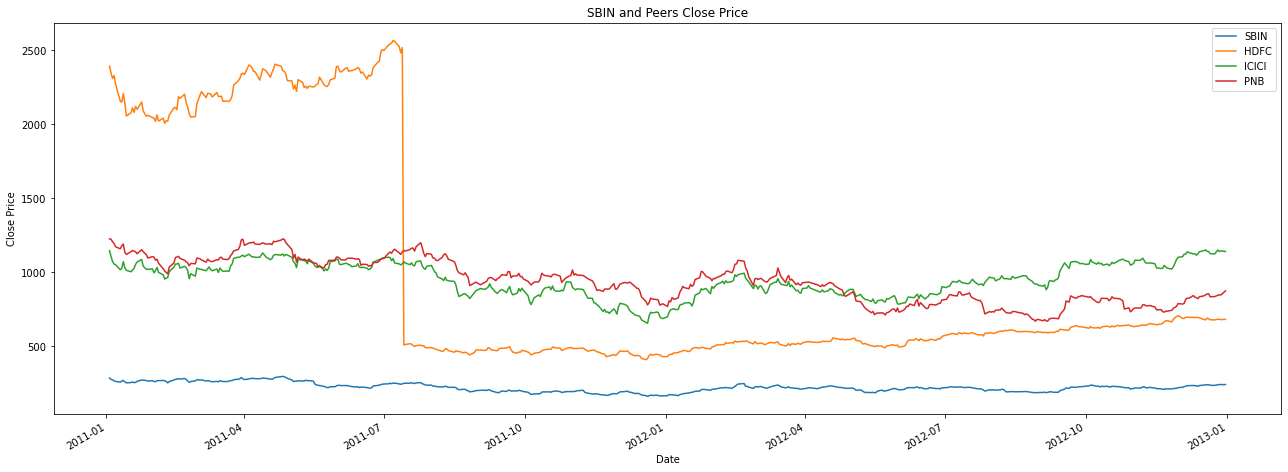

In [69]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot(label = "SBIN")
hdfc['Close Price'].plot(label = "HDFC")
icici['Close Price'].plot(label = "ICICI")
pnb['Close Price'].plot(label = "PNB")
plt.legend()
plt.ylabel("Close Price")
plt.title("SBIN and Peers Close Price")
plt.show()

Accounting for share splits after verifying details from moneycontrol.com

In [70]:
hdfc['Close Price'][:"2011-07-13"] = hdfc['Close Price'][:"2011-07-13"]/5
hdfc['Close Price'] = hdfc['Close Price']/2

In [71]:
print(hdfc['Close Price']["2011-07-13":"2011-07-14"])
print(hdfc['Close Price']["2012-12-21"])

Date
2011-07-13    251.565
2011-07-14    252.950
Name: Close Price, dtype: float64
338.15


In [72]:
icici['Close Price'] = icici['Close Price']/5 # split on 04 dec 2014
pnb['Close Price'] = pnb['Close Price']/5 # splot in 18 dec 2014

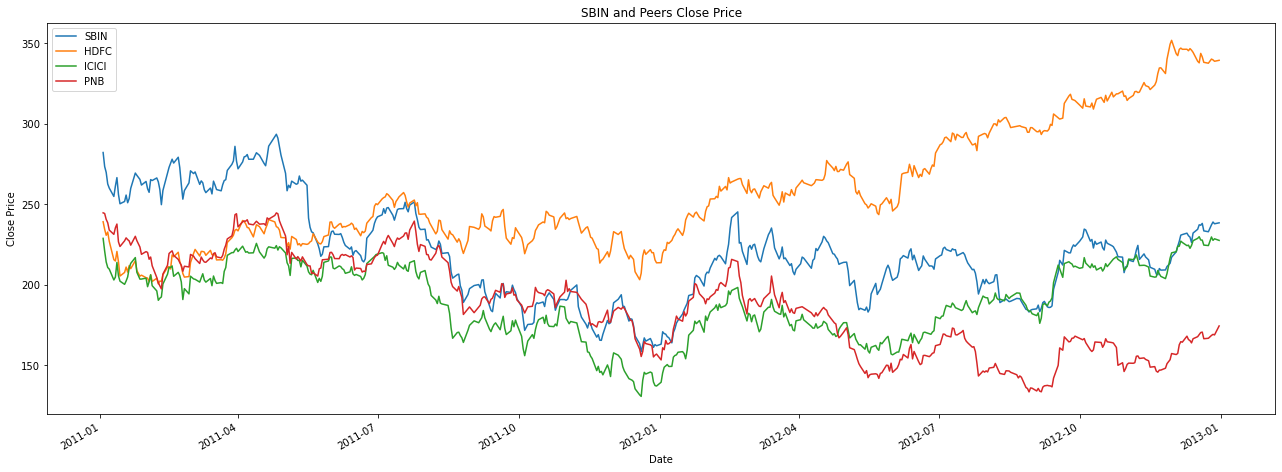

In [73]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot(label = "SBIN")
hdfc['Close Price'].plot(label = "HDFC")
icici['Close Price'].plot(label = "ICICI")
pnb['Close Price'].plot(label = "PNB")
plt.legend()
plt.ylabel("Close Price")
plt.title("SBIN and Peers Close Price")
plt.show()

The price of PNB and ICICI look more related to SBIN than HDFC. Although the mean of all stocks is different, it can be seen all follow similar trend/patterns

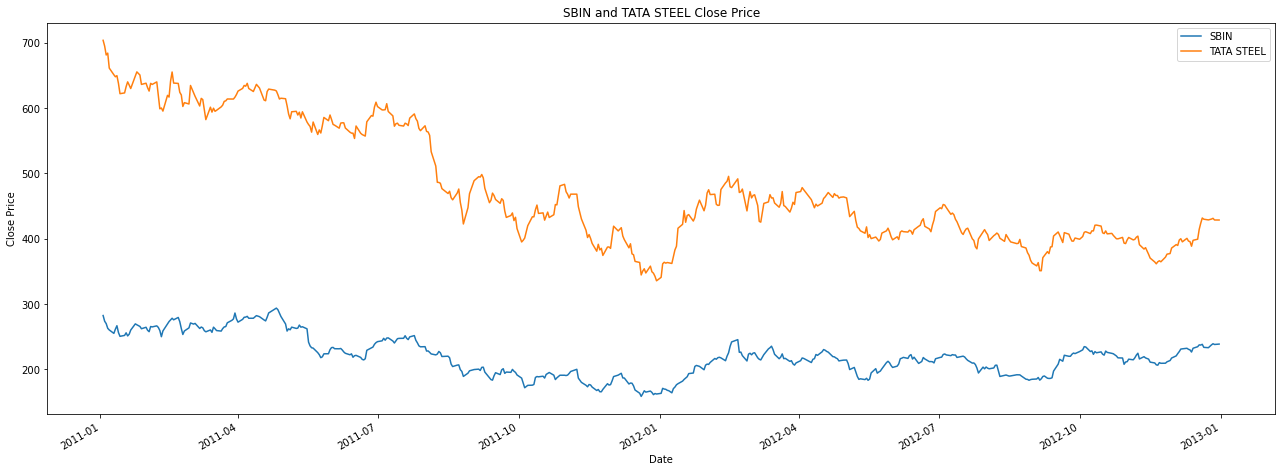

In [74]:
plt.figure(figsize=(22,8))
data_sbin['Close Price'].plot(label = "SBIN")
tatasteel['Close Price'].plot(label = "TATA STEEL")
# icici['Close Price'].plot(label = "ICICI")
# pnb['Close Price'].plot(label = "PNB")
plt.legend()
plt.ylabel("Close Price")
plt.title("SBIN and TATA STEEL Close Price")
plt.show()

Concatenating close price of all stocks to obtain correlation 

In [75]:
# Reference: https://stackoverflow.com/questions/21231834/creating-a-pandas-dataframe-from-columns-of-other-dataframes-with-similar-indexe
peers_close_data = pd.concat([data_sbin['Close Price'], hdfc['Close Price'], icici['Close Price'],pnb['Close Price'],bankex['Close'], tatasteel['Close Price']]
              ,axis=1, keys=['sbin','hdfc','icici','pnb','bankex','tatasteel'])

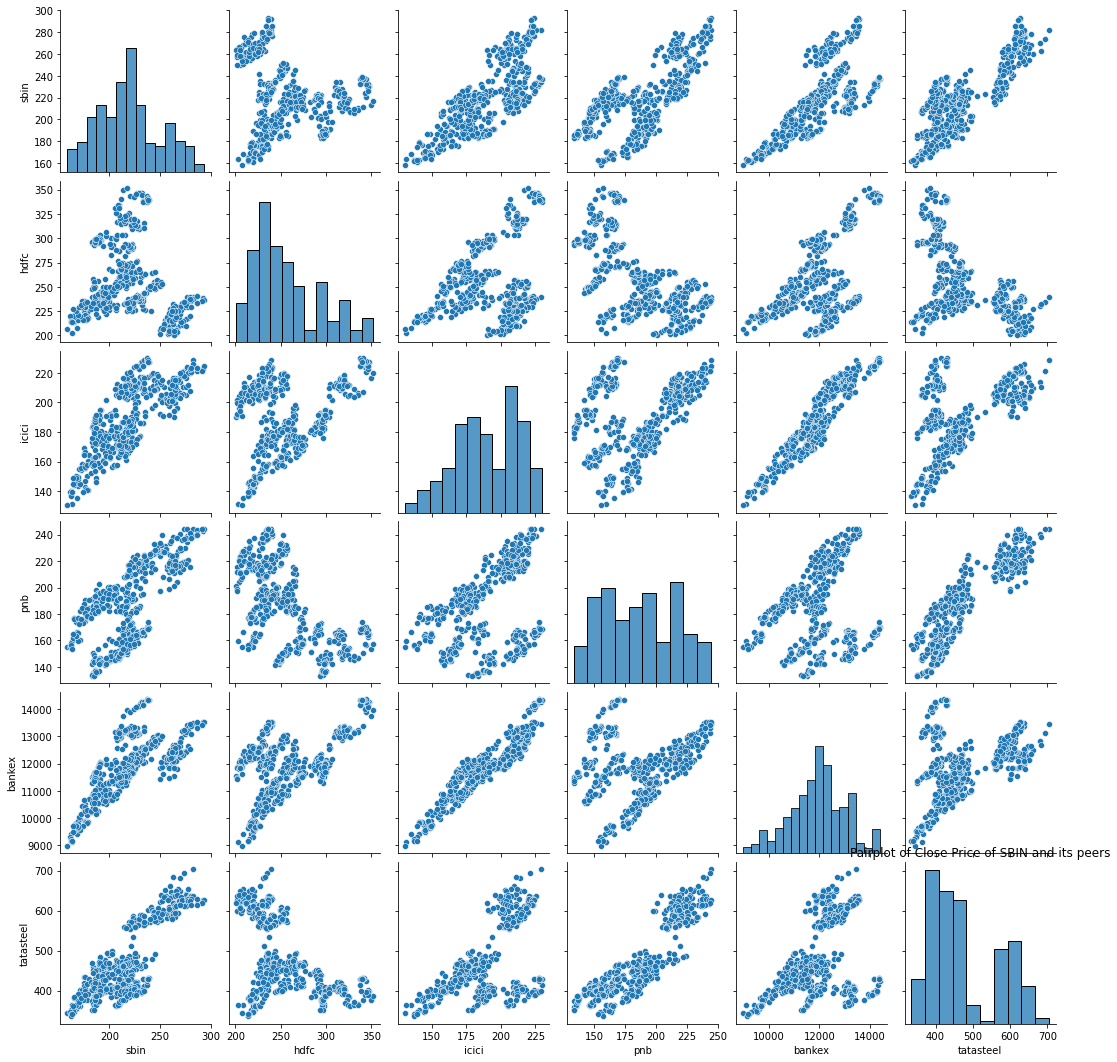

In [76]:
sns.pairplot(peers_close_data)
plt.title("Pairplot of Close Price of SBIN and its peers")
plt.show()

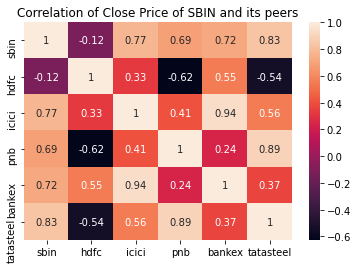

In [77]:
# Reference: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/notebook
sns.heatmap(peers_close_data.corr(), annot=True)
plt.title("Correlation of Close Price of SBIN and its peers")
plt.show()

The SBIN close price is significantly correlated with bankex(sensex bank index), icici and pnb stocks.

A very high corrlation with tata steel is observed which implies that correlation does not imply causation and such random behaviours can be easily found due to dependence of stock market on a lot of variables.

Also Close price is not providing much useful information with reagards to correlation, so we can analyse returns which would be much useful as it will be normalise measure.

#### Analysis of peers data on Returns

In [78]:
# Reference: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/notebook
peers_returns = peers_close_data.pct_change()
peers_returns.head()

sbin      hdfc     icici       pnb    bankex  tatasteel
Date                                                                   
2011-01-03       NaN       NaN       NaN       NaN       NaN        NaN
2011-01-04 -0.030930 -0.019703 -0.034540 -0.001717 -0.024762  -0.012653
2011-01-05 -0.013279 -0.015789 -0.030794 -0.014990 -0.021906  -0.019438
2011-01-06 -0.026730  0.008867 -0.015933 -0.008690 -0.011390   0.004112
2011-01-07 -0.009656 -0.025141 -0.004796 -0.019084 -0.013819  -0.033489

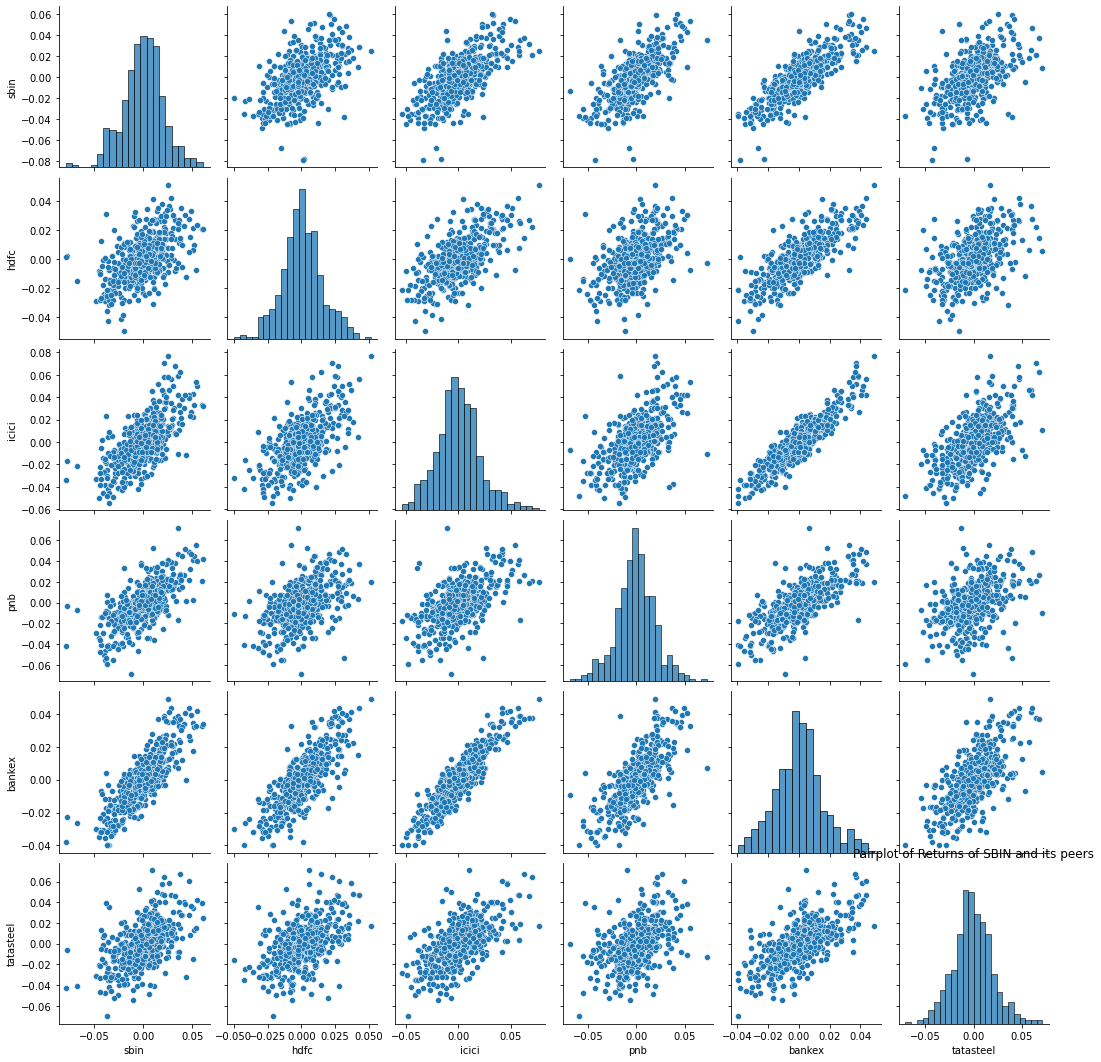

In [79]:
sns.pairplot(peers_returns)
plt.title("Pairplot of Returns of SBIN and its peers")
plt.show()

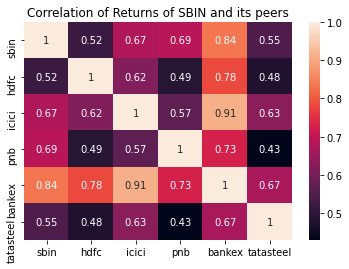

In [80]:
sns.heatmap(peers_returns.corr(), annot=True)
plt.title("Correlation of Returns of SBIN and its peers")
plt.show()

For Returns, the correlation of SBIN with TATA STEEL is less.

The correlation with bankex is highest and with pnb and icici is more significant than hdfc.

Returns seem to be a better measure to consider when accounting for peers data.

________________

### Analysing Volume Vs Close Price

Volume is an important factor considered in various tehnical indicators for understanding the stock movement, Here graph of volume and close price are plooted together to understand the variation of close price w.r.t No of shares traded i.e. volume.

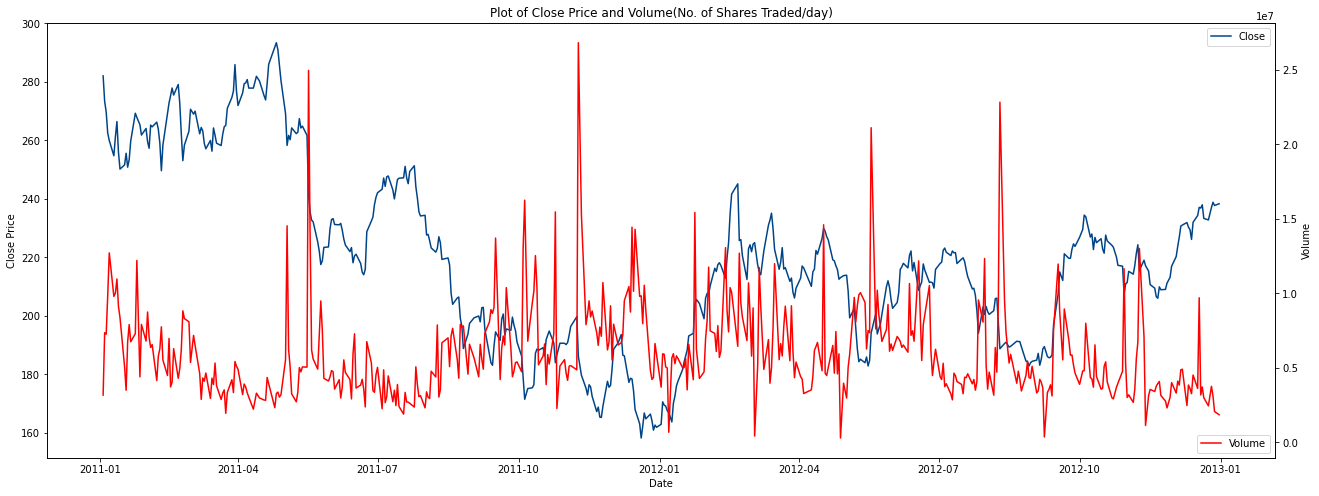

In [81]:
fig, ax1 = plt.subplots(figsize=(22,8))
ax2 = ax1.twinx()
sns.lineplot(x=data_sbin.index,y=data_sbin['Close Price']
         ,color='#004488'
         ,ax=ax1)
sns.lineplot(x=data_sbin.index,y=data_sbin['Volume'],
             color='r',
             ax=ax2)
ax1.legend(['Close'],loc=1)
ax2.legend(['Volume'],loc=4)
plt.title("Plot of Close Price and Volume(No. of Shares Traded/day)")
plt.show()

It is evident from the graph on every large spike in volume, a sharp upward/downward movement is present.

##### Trade Volume (No. of trades executed in a day Vs Close Price

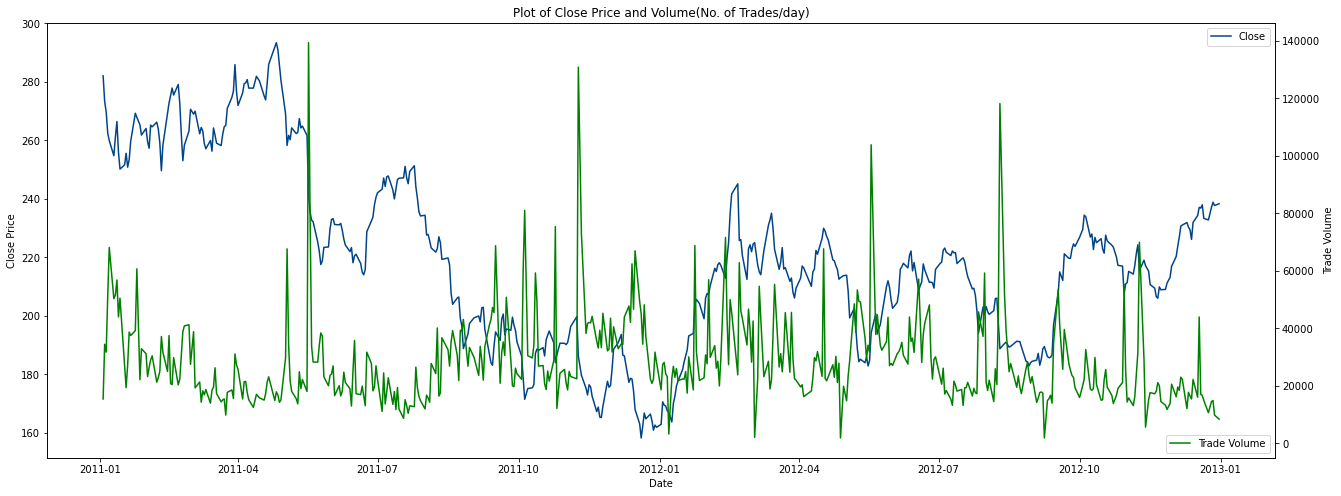

In [82]:
fig, ax1 = plt.subplots(figsize=(22,8))
ax2 = ax1.twinx()
sns.lineplot(x=data_sbin.index,y=data_sbin['Close Price']
         ,color='#004488'
         ,ax=ax1)
sns.lineplot(x=data_sbin.index,y=data_sbin['Trade Volume'],
             color='g',
             ax=ax2)
ax1.legend(['Close'],loc=1)
ax2.legend(['Trade Volume'],loc=4)
plt.title("Plot of Close Price and Volume(No. of Trades/day)")
plt.show()

The plot of No of trades volume looks very similar to  the share's volume plot.

In [83]:
print("Correlation between Share Volume and Trade Volume: ",data_sbin['Volume'].corr(data_sbin['Trade Volume']))

Correlation between Share Volume and Trade Volume:  0.9792460920124668


As the correlation between Share volume and trade volume is  high, so we can use only share volume for our model which is most oftenly used.

______________

# References
1. https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/notebook
2. https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
3. https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/